In [1]:
import nest_asyncio
import PyUber
import warnings
import time
import asyncio
import pandas as pd
from datetime import datetime
nest_asyncio.apply() #### To allow async Pyuber code execution inside a jupyter nb
warnings.filterwarnings("ignore", message="pandas only supports SQLAlchemy connectable")

In [2]:
import subprocess
import sys
import importlib.util
import platform

In [3]:
def uninstall(package):
    """Uninstall a specified package."""
    print(f"Attempting to uninstall {package}...")
    subprocess.check_call([sys.executable, '-m', 'pip', 'uninstall', '-y', package])
    print(f"Uninstallation of {package} complete.")

def install(package):
    """Install a package. Open a new terminal window on Windows to display progress."""
    print(f"Installing {package}...")
    subprocess.run([sys.executable, "-m", "pip", "install", package], check=True)
    print(f"Installation of {package} complete.")

In [4]:
# Informative print statement before checking Python dependencies
print("Checking Python dependencies for LAK Lot Dispo OneClick...")

Checking Python dependencies for LAK Lot Dispo OneClick...


In [5]:
# List of required packages
packages = [
    'pandas',
    'PyUber',
    'pytz',
    'matplotlib',
    'numpy'
]

In [6]:
# Check and install missing packages
for package in packages:
    if importlib.util.find_spec(package) is None:
        print(f"{package} is not installed. Installing now...")
        install(package)
    else:
        print(f"{package} is already installed.")


pandas is already installed.
PyUber is already installed.
pytz is already installed.
matplotlib is already installed.
numpy is already installed.


In [7]:
# List of packages to import for step indicator
import_modules = [
    'datetime', 'timedelta', 'pandas', 'PyUber', 'pytz', 'urllib.parse', 
    'webbrowser', 'json', 'matplotlib.pyplot', 'numpy', 
    'matplotlib.dates', 'tkinter', 'ttk', 'io.BytesIO', 'base64', 'tempfile', 'os'
]

In [8]:
imported_count = 0
total_imports = len(import_modules)

try:
    print("Importing Packages")
    
    from datetime import datetime, timedelta 
    imported_count += 1
    print(f"Imported datetime, timedelta({imported_count}/{total_imports})")
    
    import pandas as pd 
    imported_count += 1
    print(f"Imported pandas ({imported_count}/{total_imports})")
    
    import PyUber 
    imported_count += 1
    print(f"Imported PyUber ({imported_count}/{total_imports})")
    
    import pytz
    imported_count += 1
    print(f"Imported pytz ({imported_count}/{total_imports})")
    
    import urllib.parse 
    imported_count += 1 
    print(f"Imported urllib.parse ({imported_count}/{total_imports})")
    
    import webbrowser 
    imported_count += 1
    print(f"Imported webbrowser ({imported_count}/{total_imports})")
    
    import json 
    imported_count += 1
    print(f"Imported json ({imported_count}/{total_imports})")
    
    import matplotlib.pyplot as plt 
    imported_count += 1
    print(f"Imported matplotlib.pyplot ({imported_count}/{total_imports})")
    
    import numpy as np 
    imported_count += 1
    print(f"Imported numpy ({imported_count}/{total_imports})")
    
    from matplotlib.dates import DateFormatter, date2num, num2date
    imported_count += 1
    print(f"Imported DateFormatter, date2num, num2date ({imported_count}/{total_imports})")
    
    import tkinter as tk 
    imported_count += 1
    print(f"Imported tkinter ({imported_count}/{total_imports})")
    
    from tkinter import ttk 
    imported_count += 1
    print(f"Imported ttk ({imported_count}/{total_imports})")
    
    from io import BytesIO 
    imported_count += 1
    print(f"Imported io.BytesIO ({imported_count}/{total_imports})")
    
    import base64
    imported_count += 1
    print(f"Imported base64 ({imported_count}/{total_imports})")
    
    import tempfile 
    imported_count += 1
    print(f"Imported tempfile ({imported_count}/{total_imports})")
    
    import os 
    imported_count += 1
    print(f"Imported os ({imported_count}/{total_imports})")
    
    print("All imports successful")
    
except ImportError as e:
    print(f"Import error at step {imported_count + 1}/{total_imports}: {e}")

Importing Packages
Imported datetime, timedelta(1/17)
Imported pandas (2/17)
Imported PyUber (3/17)
Imported pytz (4/17)
Imported urllib.parse (5/17)
Imported webbrowser (6/17)
Imported json (7/17)
Imported matplotlib.pyplot (8/17)
Imported numpy (9/17)
Imported DateFormatter, date2num, num2date (10/17)
Imported tkinter (11/17)
Imported ttk (12/17)
Imported io.BytesIO (13/17)
Imported base64 (14/17)
Imported tempfile (15/17)
Imported os (16/17)
All imports successful


In [9]:
sites = ['D1D']
ds = [f'{site}_PROD_XEUS' for site in sites]

In [10]:
# ####################
# ###################
# ###################

# lot = "D4528220"
# operation = "257717"

# def sql_waferChamberHistory(operation, lot):
#     """ 
#     Construct the updated SQL query with given operation and lot
#     """ 
    
#     return f""" 
#     SELECT 'D1V' "SITE"
#       ,h.RUNKEY
#       ,h.BATCH_ID
#       ,h.LOTOPERKEY
#       ,h.LOT
#       ,h.OPERATION
#       ,h.ROUTE
#       ,c.WAFER "WAFER_ID"
#       ---,c.SLOT
#       ,CAST(c.SLOT AS INTEGER) "SLOT"
#       ,c.START_TIME
#       ,c.END_TIME
#       ,c.STATE
#       ,c.ENTITY
#       ,c.CHAMBER
#       ,c.ENTITY_CHAMBER
#       ,c.SUBENTITY
#       ,c.SUB_OPERATION
#       ,c.CHAMBER_SEQUENCE
#       ,c.CHAMBER_PROCESS_ORDER "PROCESS_ORDER"
#       ,c.CHAMBER_PROCESS_DURATION "PROCESS_TIME"
#       ,c.IN_SUITCASE_FLAG
#       ,lr.RECIPE "LOT_RECIPE"
#       ,wr.RECIPE "WAFER_RECIPE"
#       ,cr.RECIPE "CHAMBER_RECIPE"
#       ,a.ATTRIBUTE_STRING "ATTRIBUTES"
#       ,h.PRODUCT
#       ,h.LAST_TXN_TIME
#     FROM F_LOTENTITYHIST h
#     INNER JOIN F_WAFERENTITYHIST w
#       ON w.RUNKEY=h.RUNKEY
#       AND w.ENTITY=h.ENTITY
#     INNER JOIN F_WAFERCHAMBERHIST c
#       ON c.RUNKEY=h.RUNKEY
#       AND c.ENTITY=h.ENTITY
#       AND c.WAFER=w.WAFER
#     INNER JOIN F_LOT_WAFER_RECIPE wr
#       ON wr.RECIPE_ID=w.WAFER_RECIPE_ID
#     INNER JOIN F_LOT_WAFER_RECIPE lr
#       ON lr.RECIPE_ID=h.LOT_RECIPE_ID
#     INNER JOIN F_LOT_WAFER_RECIPE cr
#       ON cr.RECIPE_ID=c.WAFER_CHAMBER_RECIPE_ID
#     INNER JOIN F_LOT_WAFER_ATTRIBUTE a
#       ON a.ATTRIBUTE_ID=c.ATTRIBUTE_ID
#     WHERE h.ENTITY IN (SELECT ENTITY FROM F_ENTITY WHERE (ENTITY LIKE 'LAK%' ESCAPE '\\'))
#       AND h.LAST_TXN_TIME>=TRUNC(CURRENT_DATE)-60
#       AND h.OPERATION IN ('{operation}')
#       AND h.LOT='{lot}'

#     """ 

In [11]:
####################
###################
###################



def sql_waferChamberHistory(operation, lot):
    """ 
    Construct the updated SQL query with given operation and lot
    """ 
    
    return f""" 
    SELECT 'D1D' "SITE"
      ,h.RUNKEY
      ,h.BATCH_ID
      ,h.LOTOPERKEY
      ,h.LOT
      ,h.OPERATION
      ,h.ROUTE
      ,c.WAFER "WAFER_ID"
      ---,c.SLOT
      ,CAST(c.SLOT AS INTEGER) "SLOT"
      ,c.START_TIME
      ,c.END_TIME
      ,c.STATE
      ,c.ENTITY
      ,c.CHAMBER
      ,c.ENTITY_CHAMBER
      ,c.SUBENTITY
      ,c.SUB_OPERATION
      ,c.CHAMBER_SEQUENCE
      ,c.CHAMBER_PROCESS_ORDER "PROCESS_ORDER"
      ,c.CHAMBER_PROCESS_DURATION "PROCESS_TIME"
      ,c.IN_SUITCASE_FLAG
      ,lr.RECIPE "LOT_RECIPE"
      ,wr.RECIPE "WAFER_RECIPE"
      ,cr.RECIPE "CHAMBER_RECIPE"
      ,a.ATTRIBUTE_STRING "ATTRIBUTES"
      ,h.PRODUCT
      ,h.LAST_TXN_TIME
    FROM F_LOTENTITYHIST h
    INNER JOIN F_WAFERENTITYHIST w
      ON w.RUNKEY=h.RUNKEY
      AND w.ENTITY=h.ENTITY
    INNER JOIN F_WAFERCHAMBERHIST c
      ON c.RUNKEY=h.RUNKEY
      AND c.ENTITY=h.ENTITY
      AND c.WAFER=w.WAFER
    INNER JOIN F_LOT_WAFER_RECIPE wr
      ON wr.RECIPE_ID=w.WAFER_RECIPE_ID
    INNER JOIN F_LOT_WAFER_RECIPE lr
      ON lr.RECIPE_ID=h.LOT_RECIPE_ID
    INNER JOIN F_LOT_WAFER_RECIPE cr
      ON cr.RECIPE_ID=c.WAFER_CHAMBER_RECIPE_ID
    INNER JOIN F_LOT_WAFER_ATTRIBUTE a
      ON a.ATTRIBUTE_ID=c.ATTRIBUTE_ID
    WHERE h.ENTITY IN (SELECT ENTITY FROM F_ENTITY WHERE (ENTITY LIKE 'BSP%' ESCAPE '\\'))
      AND h.LAST_TXN_TIME>=TRUNC(CURRENT_DATE)-60
      AND h.OPERATION IN ('{operation}')
      AND h.LOT='{lot}'

    """ 

In [12]:
############################################
###########################################        

def run_sql(sql=None, datasource='ds'):
    """
    Connect to a database with a connection and run a query. Return data as a dataframe.
    """
    try:
        cxn = PyUber.connect(datasource)
        result = cxn.execute(sql)
        rows = result.fetchall()
        column_names = [x[0] for x in result.description]
        df = pd.DataFrame(rows, columns=column_names)
        return df
    except Exception as e:
        print(datetime.now(), '|', 'ERROR. Could not execute query:', e)
    finally:
        cxn.close()

In [14]:
########################################
#######################################
def plot_to_base64():
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    return base64.b64encode(buf.getvalue()).decode('utf-8')

In [15]:
################################################
###############################################
def display_html_in_browser(html_content):
    file_path = os.path.expanduser("~/test_page.html")
    
    with open(file_path, "w") as f:
        f.write(html_content)
    
    webbrowser.open("file://" + file_path)

In [16]:
##############################
##############################

def export_to_html(df, plot_img_base64):
    html_table = df.to_html(classes='table', index=False, border=0)
    html_content = f'''
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <title>Wafer History Table</title>
        <style>
            /* Your CSS styles here */
        </style>
    </head>
    <body>
        <h2 style="text-align: center;">Wafer History</h2>
        {html_table}
        <div style="text-align: center;">
            <img src="data:image/png;base64,{plot_img_base64}" alt="Wafer History Plot"/>
        </div>
    </body>
    </html>
    '''
    display_html_in_browser(html_content)

In [17]:
lot = "D5038270"
operation = "260536"

updated_query = sql_waferChamberHistory(operation, lot)
print(updated_query)

 
    SELECT 'D1D' "SITE"
      ,h.RUNKEY
      ,h.BATCH_ID
      ,h.LOTOPERKEY
      ,h.LOT
      ,h.OPERATION
      ,h.ROUTE
      ,c.WAFER "WAFER_ID"
      ---,c.SLOT
      ,CAST(c.SLOT AS INTEGER) "SLOT"
      ,c.START_TIME
      ,c.END_TIME
      ,c.STATE
      ,c.ENTITY
      ,c.CHAMBER
      ,c.ENTITY_CHAMBER
      ,c.SUBENTITY
      ,c.SUB_OPERATION
      ,c.CHAMBER_SEQUENCE
      ,c.CHAMBER_PROCESS_ORDER "PROCESS_ORDER"
      ,c.CHAMBER_PROCESS_DURATION "PROCESS_TIME"
      ,c.IN_SUITCASE_FLAG
      ,lr.RECIPE "LOT_RECIPE"
      ,wr.RECIPE "WAFER_RECIPE"
      ,cr.RECIPE "CHAMBER_RECIPE"
      ,a.ATTRIBUTE_STRING "ATTRIBUTES"
      ,h.PRODUCT
      ,h.LAST_TXN_TIME
    FROM F_LOTENTITYHIST h
    INNER JOIN F_WAFERENTITYHIST w
      ON w.RUNKEY=h.RUNKEY
      AND w.ENTITY=h.ENTITY
    INNER JOIN F_WAFERCHAMBERHIST c
      ON c.RUNKEY=h.RUNKEY
      AND c.ENTITY=h.ENTITY
      AND c.WAFER=w.WAFER
    INNER JOIN F_LOT_WAFER_RECIPE wr
      ON wr.RECIPE_ID=w.WAFER_RECIPE_ID
    IN

In [18]:
waferChamberHistory = run_sql(updated_query, ds)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
# waferChamberHistory.head()

In [19]:
waferChamberHistory.SLOT.max()

24

In [20]:
waferChamberHistory[waferChamberHistory.SLOT == waferChamberHistory.SLOT.max()].sort_values(by='START_TIME', ascending=True).reset_index(drop=True).shape

(13, 27)

In [21]:
slots = pd.Series(waferChamberHistory.SLOT.sort_values().unique())
slots[0]

2

In [22]:
waferChamberHistory['START_TIME'] = pd.to_datetime(waferChamberHistory['START_TIME'], errors='coerce')
waferChamberHistory['END_TIME'] = pd.to_datetime(waferChamberHistory['END_TIME'], errors='coerce')

In [23]:
waferChamberHistory[waferChamberHistory.SLOT == slots[0]].sort_values(by='START_TIME', ascending=True).reset_index(drop=True)

,SITE,RUNKEY,BATCH_ID,LOTOPERKEY,LOT,OPERATION,ROUTE,WAFER_ID,SLOT,START_TIME,END_TIME,STATE,ENTITY,CHAMBER,ENTITY_CHAMBER,SUBENTITY,SUB_OPERATION,CHAMBER_SEQUENCE,PROCESS_ORDER,PROCESS_TIME,IN_SUITCASE_FLAG,LOT_RECIPE,WAFER_RECIPE,CHAMBER_RECIPE,ATTRIBUTES,PRODUCT,LAST_TXN_TIME
0,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:07:11.463,2025-04-02 09:07:30.314,Completed,BSP07,ROBOT,BSP07_ROBOT,None,Robot-1,1.0,17.0,0.31,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
1,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:07:30.347,2025-04-02 09:12:14.797,Completed,BSP07,POSITION TABLE,BSP07_POSITION TABLE,None,Position-1,2.0,12.0,4.74,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
2,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:12:14.823,2025-04-02 09:17:23.220,Completed,BSP07,T-ARM1,BSP07_T-ARM1,None,Robot-2,3.0,12.0,5.14,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
3,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:17:23.257,2025-04-02 09:20:49.529,Completed,BSP07,FRONT CHUCK TABLE,BSP07_FRONT CHUCK TABLE,None,Table-1,4.0,12.0,3.44,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
4,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:20:49.558,2025-04-02 09:26:06.635,Completed,BSP07,Z1,BSP07_Z1,None,Process-1,5.0,12.0,5.28,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
5,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:20:51.326,2025-04-02 09:28:45.331,Completed,BSP07,CT-D,BSP07_CT-D,None,Process-2,6.0,5.0,7.90,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
6,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:26:06.666,2025-04-02 09:31:37.988,Completed,BSP07,Z2,BSP07_Z2,None,Process-3,7.0,12.0,5.52,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
7,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:31:38.014,2025-04-02 09:33:34.430,Completed,BSP07,Z3,BSP07_Z3,None,Process-5,9.0,12.0,1.94,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
8,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:33:34.455,2025-04-02 09:34:00.104,Completed,BSP07,WAFER WASH,BSP07_WAFER WASH,None,Wash-1,10.0,12.0,0.43,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
9,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:34:00.129,2025-04-02 09:35:32.417,Completed,BSP07,T-ARM2,BSP07_T-ARM2,None,Robot-3,11.0,12.0,1.54,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785


In [25]:
waferChamberHistory[waferChamberHistory.SLOT == slots[0]].sort_values(by='END_TIME', ascending=True).reset_index(drop=True)

,SITE,RUNKEY,BATCH_ID,LOTOPERKEY,LOT,OPERATION,ROUTE,WAFER_ID,SLOT,START_TIME,END_TIME,STATE,ENTITY,CHAMBER,ENTITY_CHAMBER,SUBENTITY,SUB_OPERATION,CHAMBER_SEQUENCE,PROCESS_ORDER,PROCESS_TIME,IN_SUITCASE_FLAG,LOT_RECIPE,WAFER_RECIPE,CHAMBER_RECIPE,ATTRIBUTES,PRODUCT,LAST_TXN_TIME
0,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:07:11.463,2025-04-02 09:07:30.314,Completed,BSP07,ROBOT,BSP07_ROBOT,None,Robot-1,1.0,17.0,0.31,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
1,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:07:30.347,2025-04-02 09:12:14.797,Completed,BSP07,POSITION TABLE,BSP07_POSITION TABLE,None,Position-1,2.0,12.0,4.74,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
2,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:12:14.823,2025-04-02 09:17:23.220,Completed,BSP07,T-ARM1,BSP07_T-ARM1,None,Robot-2,3.0,12.0,5.14,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
3,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:17:23.257,2025-04-02 09:20:49.529,Completed,BSP07,FRONT CHUCK TABLE,BSP07_FRONT CHUCK TABLE,None,Table-1,4.0,12.0,3.44,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
4,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:20:49.558,2025-04-02 09:26:06.635,Completed,BSP07,Z1,BSP07_Z1,None,Process-1,5.0,12.0,5.28,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
5,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:20:51.326,2025-04-02 09:28:45.331,Completed,BSP07,CT-D,BSP07_CT-D,None,Process-2,6.0,5.0,7.90,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
6,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,NaT,2025-04-02 09:31:22.962,Completed,BSP07,CT-D,BSP07_CT-D,None,Process-4,8.0,6.0,NaN,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
7,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:26:06.666,2025-04-02 09:31:37.988,Completed,BSP07,Z2,BSP07_Z2,None,Process-3,7.0,12.0,5.52,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
8,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:31:38.014,2025-04-02 09:33:34.430,Completed,BSP07,Z3,BSP07_Z3,None,Process-5,9.0,12.0,1.94,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
9,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG031SLD5,2,2025-04-02 09:33:34.455,2025-04-02 09:34:00.104,Completed,BSP07,WAFER WASH,BSP07_WAFER WASH,None,Wash-1,10.0,12.0,0.43,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785


In [26]:
df = waferChamberHistory[waferChamberHistory.SLOT == slots[1]].sort_values(by='END_TIME', ascending=True).reset_index(drop=True)
df

,SITE,RUNKEY,BATCH_ID,LOTOPERKEY,LOT,OPERATION,ROUTE,WAFER_ID,SLOT,START_TIME,END_TIME,STATE,ENTITY,CHAMBER,ENTITY_CHAMBER,SUBENTITY,SUB_OPERATION,CHAMBER_SEQUENCE,PROCESS_ORDER,PROCESS_TIME,IN_SUITCASE_FLAG,LOT_RECIPE,WAFER_RECIPE,CHAMBER_RECIPE,ATTRIBUTES,PRODUCT,LAST_TXN_TIME
0,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,2025-04-02 09:01:47.959,2025-04-02 09:02:07.075,Completed,BSP07,ROBOT,BSP07_ROBOT,None,Robot-1,1.0,15.0,0.32,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
1,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,2025-04-02 09:02:07.116,2025-04-02 09:06:38.497,Completed,BSP07,POSITION TABLE,BSP07_POSITION TABLE,None,Position-1,2.0,11.0,4.52,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
2,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,2025-04-02 09:06:38.519,2025-04-02 09:11:58.862,Completed,BSP07,T-ARM1,BSP07_T-ARM1,None,Robot-2,3.0,11.0,5.34,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
3,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,2025-04-02 09:11:58.895,2025-04-02 09:15:25.139,Completed,BSP07,FRONT CHUCK TABLE,BSP07_FRONT CHUCK TABLE,None,Table-1,4.0,11.0,3.44,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
4,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,2025-04-02 09:15:25.171,2025-04-02 09:20:49.412,Completed,BSP07,Z1,BSP07_Z1,None,Process-1,5.0,11.0,5.40,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
5,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,2025-04-02 09:15:26.540,2025-04-02 09:23:25.320,Completed,BSP07,CT-C,BSP07_CT-C,None,Process-2,6.0,5.0,7.98,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
6,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,NaT,2025-04-02 09:25:51.488,Completed,BSP07,CT-C,BSP07_CT-C,None,Process-4,8.0,6.0,NaN,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
7,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,2025-04-02 09:20:49.450,2025-04-02 09:26:06.524,Completed,BSP07,Z2,BSP07_Z2,None,Process-3,7.0,11.0,5.28,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
8,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,2025-04-02 09:26:06.571,2025-04-02 09:31:37.900,Completed,BSP07,Z3,BSP07_Z3,None,Process-5,9.0,11.0,5.52,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
9,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,2025-04-02 09:31:37.944,2025-04-02 09:32:03.536,Completed,BSP07,WAFER WASH,BSP07_WAFER WASH,None,Wash-1,10.0,11.0,0.43,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785


In [27]:
df.loc[df['SUB_OPERATION'] == 'Process-2', 'CHAMBER']

5    CT-C
Name: CHAMBER, dtype: object

In [28]:
df.loc[df['SUB_OPERATION'] == 'Process-2', 'CHAMBER'].iloc[0]

'CT-C'

In [29]:
value = df.loc[df['SUB_OPERATION'] == 'Process-2', 'CHAMBER'].iloc[0]
df['CHUCK_TABLE'] = value

In [30]:
df[['START_TIME', 'END_TIME', 'CHAMBER', 'SUB_OPERATION', 'CHUCK_TABLE']]

,START_TIME,END_TIME,CHAMBER,SUB_OPERATION,CHUCK_TABLE
0,2025-04-02 09:01:47.959,2025-04-02 09:02:07.075,ROBOT,Robot-1,CT-C
1,2025-04-02 09:02:07.116,2025-04-02 09:06:38.497,POSITION TABLE,Position-1,CT-C
2,2025-04-02 09:06:38.519,2025-04-02 09:11:58.862,T-ARM1,Robot-2,CT-C
3,2025-04-02 09:11:58.895,2025-04-02 09:15:25.139,FRONT CHUCK TABLE,Table-1,CT-C
4,2025-04-02 09:15:25.171,2025-04-02 09:20:49.412,Z1,Process-1,CT-C
5,2025-04-02 09:15:26.540,2025-04-02 09:23:25.320,CT-C,Process-2,CT-C
6,NaT,2025-04-02 09:25:51.488,CT-C,Process-4,CT-C
7,2025-04-02 09:20:49.450,2025-04-02 09:26:06.524,Z2,Process-3,CT-C
8,2025-04-02 09:26:06.571,2025-04-02 09:31:37.900,Z3,Process-5,CT-C
9,2025-04-02 09:31:37.944,2025-04-02 09:32:03.536,WAFER WASH,Wash-1,CT-C


In [31]:
#Using regex to seen value that contain a sequence of CT-, followed with at least one character and ignores NaN. Returns boolean if it's the case
#sequence like CT-C, CT-A will be true. However, ABCT-A would also be true. Not good enough
df['CHAMBER'].str.contains(r'CT-.+', na=False)

0     False
1     False
2     False
3     False
4     False
5      True
6      True
7     False
8     False
9     False
10    False
11    False
12    False
Name: CHAMBER, dtype: bool

In [32]:
#This will ensure only rows that Start with CT- accounted for. Anything else, for example ABCT-, eventhough CT- is embedded in the string, will not return True
df['CHAMBER'].str.contains(r'^CT-.+', na=False)

0     False
1     False
2     False
3     False
4     False
5      True
6      True
7     False
8     False
9     False
10    False
11    False
12    False
Name: CHAMBER, dtype: bool

In [33]:
mask = df['CHAMBER'].str.contains(r'^CT-.+', na=False)
if mask.any(): #check if any row returns true. if any of them is true, then true
    value = df.loc[mask, 'CHAMBER'].iloc[0] 
    df['CHUCK_TABLE2'] = value

In [34]:
df[['START_TIME', 'END_TIME', 'CHAMBER', 'SUB_OPERATION', 'CHUCK_TABLE', 'CHUCK_TABLE2']]

,START_TIME,END_TIME,CHAMBER,SUB_OPERATION,CHUCK_TABLE,CHUCK_TABLE2
0,2025-04-02 09:01:47.959,2025-04-02 09:02:07.075,ROBOT,Robot-1,CT-C,CT-C
1,2025-04-02 09:02:07.116,2025-04-02 09:06:38.497,POSITION TABLE,Position-1,CT-C,CT-C
2,2025-04-02 09:06:38.519,2025-04-02 09:11:58.862,T-ARM1,Robot-2,CT-C,CT-C
3,2025-04-02 09:11:58.895,2025-04-02 09:15:25.139,FRONT CHUCK TABLE,Table-1,CT-C,CT-C
4,2025-04-02 09:15:25.171,2025-04-02 09:20:49.412,Z1,Process-1,CT-C,CT-C
5,2025-04-02 09:15:26.540,2025-04-02 09:23:25.320,CT-C,Process-2,CT-C,CT-C
6,NaT,2025-04-02 09:25:51.488,CT-C,Process-4,CT-C,CT-C
7,2025-04-02 09:20:49.450,2025-04-02 09:26:06.524,Z2,Process-3,CT-C,CT-C
8,2025-04-02 09:26:06.571,2025-04-02 09:31:37.900,Z3,Process-5,CT-C,CT-C
9,2025-04-02 09:31:37.944,2025-04-02 09:32:03.536,WAFER WASH,Wash-1,CT-C,CT-C


In [35]:
df['CHAMBER']

0                 ROBOT
1        POSITION TABLE
2                T-ARM1
3     FRONT CHUCK TABLE
4                    Z1
5                  CT-C
6                  CT-C
7                    Z2
8                    Z3
9            WAFER WASH
10               T-ARM2
11        SPINNER TABLE
12                ROBOT
Name: CHAMBER, dtype: object

In [36]:
df.loc[:, 'CHAMBER']

0                 ROBOT
1        POSITION TABLE
2                T-ARM1
3     FRONT CHUCK TABLE
4                    Z1
5                  CT-C
6                  CT-C
7                    Z2
8                    Z3
9            WAFER WASH
10               T-ARM2
11        SPINNER TABLE
12                ROBOT
Name: CHAMBER, dtype: object

In [37]:
#returns all values from column "CHAMBER" where the corresponding row in mask is True. A filtration mechanism
df.loc[mask, 'CHAMBER'] 

5    CT-C
6    CT-C
Name: CHAMBER, dtype: object

In [38]:
df['CHAMBER'] != value


0      True
1      True
2      True
3      True
4      True
5     False
6     False
7      True
8      True
9      True
10     True
11     True
12     True
Name: CHAMBER, dtype: bool

In [40]:
df = df[df['CHAMBER'] != value]
df

,SITE,RUNKEY,BATCH_ID,LOTOPERKEY,LOT,OPERATION,ROUTE,WAFER_ID,SLOT,START_TIME,END_TIME,STATE,ENTITY,CHAMBER,ENTITY_CHAMBER,SUBENTITY,SUB_OPERATION,CHAMBER_SEQUENCE,PROCESS_ORDER,PROCESS_TIME,IN_SUITCASE_FLAG,LOT_RECIPE,WAFER_RECIPE,CHAMBER_RECIPE,ATTRIBUTES,PRODUCT,LAST_TXN_TIME,CHUCK_TABLE,CHUCK_TABLE2
0,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,2025-04-02 09:01:47.959,2025-04-02 09:02:07.075,Completed,BSP07,ROBOT,BSP07_ROBOT,None,Robot-1,1.0,15.0,0.32,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785,CT-C,CT-C
1,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,2025-04-02 09:02:07.116,2025-04-02 09:06:38.497,Completed,BSP07,POSITION TABLE,BSP07_POSITION TABLE,None,Position-1,2.0,11.0,4.52,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785,CT-C,CT-C
2,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,2025-04-02 09:06:38.519,2025-04-02 09:11:58.862,Completed,BSP07,T-ARM1,BSP07_T-ARM1,None,Robot-2,3.0,11.0,5.34,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785,CT-C,CT-C
3,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,2025-04-02 09:11:58.895,2025-04-02 09:15:25.139,Completed,BSP07,FRONT CHUCK TABLE,BSP07_FRONT CHUCK TABLE,None,Table-1,4.0,11.0,3.44,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785,CT-C,CT-C
4,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,2025-04-02 09:15:25.171,2025-04-02 09:20:49.412,Completed,BSP07,Z1,BSP07_Z1,None,Process-1,5.0,11.0,5.40,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785,CT-C,CT-C
7,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,2025-04-02 09:20:49.450,2025-04-02 09:26:06.524,Completed,BSP07,Z2,BSP07_Z2,None,Process-3,7.0,11.0,5.28,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785,CT-C,CT-C
8,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,2025-04-02 09:26:06.571,2025-04-02 09:31:37.900,Completed,BSP07,Z3,BSP07_Z3,None,Process-5,9.0,11.0,5.52,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785,CT-C,CT-C
9,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,2025-04-02 09:31:37.944,2025-04-02 09:32:03.536,Completed,BSP07,WAFER WASH,BSP07_WAFER WASH,None,Wash-1,10.0,11.0,0.43,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785,CT-C,CT-C
10,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,2025-04-02 09:32:03.625,2025-04-02 09:33:21.462,Completed,BSP07,T-ARM2,BSP07_T-ARM2,None,Robot-3,11.0,11.0,1.30,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785,CT-C,CT-C
11,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG028SLG6,3,2025-04-02 09:33:21.497,2025-04-02 09:35:03.998,Completed,BSP07,SPINNER TABLE,BSP07_SPINNER TABLE,None,Clean-1,12.0,11.0,1.71,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785,CT-C,CT-C


In [24]:
# waferChamberHistory['START_TIME']

In [41]:
waferChamberHistory['START_TIME'].isna().sum()

12

In [21]:
waferChamberHistory['END_TIME'].isna().sum()

0

In [28]:
# len(waferChamberHistory['START_TIME']), len(waferChamberHistory['END_TIME'])

In [42]:
#Drop observations with missing values
waferChamberHistory.dropna(subset=['START_TIME', 'END_TIME'], inplace=True)

# Sort data by START_TIME. Definitely need to sort the data by start_time
waferChamberHistory.sort_values(by='START_TIME', inplace=True)

In [43]:
waferChamberHistory.head()

,SITE,RUNKEY,BATCH_ID,LOTOPERKEY,LOT,OPERATION,ROUTE,WAFER_ID,SLOT,START_TIME,END_TIME,STATE,ENTITY,CHAMBER,ENTITY_CHAMBER,SUBENTITY,SUB_OPERATION,CHAMBER_SEQUENCE,PROCESS_ORDER,PROCESS_TIME,IN_SUITCASE_FLAG,LOT_RECIPE,WAFER_RECIPE,CHAMBER_RECIPE,ATTRIBUTES,PRODUCT,LAST_TXN_TIME
108,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG026SLF5,24,2025-04-02 08:21:42.092,2025-04-02 08:22:00.687,Completed,BSP07,ROBOT,BSP07_ROBOT,None,Robot-1,1.0,1.0,0.31,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
107,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG026SLF5,24,2025-04-02 08:22:00.733,2025-04-02 08:23:14.406,Completed,BSP07,POSITION TABLE,BSP07_POSITION TABLE,None,Position-1,2.0,1.0,1.23,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
111,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG026SLF5,24,2025-04-02 08:23:14.432,2025-04-02 08:23:51.791,Completed,BSP07,T-ARM1,BSP07_T-ARM1,None,Robot-2,3.0,1.0,0.62,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
95,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A10FZ248SLG2,23,2025-04-02 08:23:47.414,2025-04-02 08:24:05.872,Completed,BSP07,ROBOT,BSP07_ROBOT,None,Robot-1,1.0,2.0,0.31,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785
106,D1D,202514.174656,713312065.0,5.613217e+09,D5038270,260536,FL78.0HYPB,A0YJG026SLF5,24,2025-04-02 08:23:51.824,2025-04-02 08:24:13.953,Completed,BSP07,FRONT CHUCK TABLE,BSP07_FRONT CHUCK TABLE,None,Table-1,4.0,1.0,0.37,N,P78N_SHARP_5_NT,P78N_SHARP_5_NT,P78N_SHARP_5_NT,None,8PXSCV B,2025-04-02 09:37:44.785


In [49]:
unique_chambers

array(['ROBOT', 'POSITION TABLE', 'T-ARM1', 'FRONT CHUCK TABLE', 'Z1',
       'CT-A', 'Z2', 'CT-B', 'Z3', 'CT-C', 'WAFER WASH', 'CT-D', 'T-ARM2',
       'SPINNER TABLE'], dtype=object)

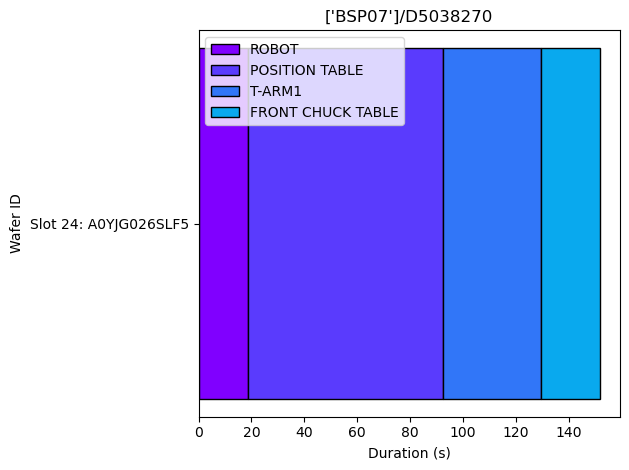

In [45]:
# D511T4F0
# 192229

unique_entities = waferChamberHistory['ENTITY'].unique()
unique_chambers = waferChamberHistory['CHAMBER'].unique()

colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_chambers)))
color_map=dict(zip(unique_chambers, colors))





#Focusing on the first unique WAFER ID. This way I could have better control of the timing
DF1 = waferChamberHistory[waferChamberHistory.WAFER_ID == waferChamberHistory.WAFER_ID.unique()[0]].reset_index(drop=True)

#First observation
START_TIME = DF1.START_TIME[0]
END_TIME = DF1.END_TIME[0]
WAFER_ID = DF1.WAFER_ID[0]
SLOT = DF1.SLOT[0]
CHAMBER = DF1.CHAMBER[0]

# Combine slot and wafer_id for the y-axis label
y_label = f"Slot {SLOT}: {WAFER_ID}"

#Normalizing the data. Setting the initial time as 0 seconds
base_time =  START_TIME
start_sec = (START_TIME - base_time).total_seconds() 
duration = (END_TIME - START_TIME).total_seconds()

#################################################################
#################################################################
#Second observation
START_TIME_1 = DF1.START_TIME[1]
END_TIME_1 = DF1.END_TIME[1]
CHAMBER_1 = DF1.CHAMBER[1]

#Wanting the barplot to begin after the first chamber is completed
start_sec_1 = (START_TIME_1 - base_time).total_seconds() 
duration_1 = (END_TIME_1 - START_TIME_1).total_seconds()


#################################################################
#################################################################
#Third observation
START_TIME_2 = DF1.START_TIME[2]
END_TIME_2 = DF1.END_TIME[2]
CHAMBER_2 = DF1.CHAMBER[2]

#Wanting the barplot to begin after the first chamber is completed
start_sec_2 = (START_TIME_2 - base_time).total_seconds() 
duration_2 = (END_TIME_2 - START_TIME_2).total_seconds()

#################################################################
#################################################################
#Fourth observation
START_TIME_3 = DF1.START_TIME[3]
END_TIME_3 = DF1.END_TIME[3]
CHAMBER_3 = DF1.CHAMBER[3]

#Wanting the barplot to begin after the first chamber is completed
start_sec_3 = (START_TIME_3 - base_time).total_seconds() 
duration_3 = (END_TIME_3 - START_TIME_3).total_seconds()

plt.barh(y_label, duration, left=start_sec,
         color=color_map[CHAMBER], edgecolor='k',
         label=CHAMBER)
#################################################################
#################################################################
plt.barh(y_label, duration_1, left=start_sec_1,
         color=color_map[CHAMBER_1], edgecolor='k',
         label=CHAMBER_1)
#################################################################
#################################################################
plt.barh(y_label, duration_2, left=start_sec_2,
         color=color_map[CHAMBER_2], edgecolor='k',
         label=CHAMBER_2)
#################################################################
#################################################################
plt.barh(y_label, duration_3, left=start_sec_3,
         color=color_map[CHAMBER_3], edgecolor='k',
         label=CHAMBER_3)



plt.legend()
plt.title(f'{unique_entities}/{lot}')
plt.xlabel('Duration (s)')
plt.ylabel('Wafer ID')

plt.tight_layout() 



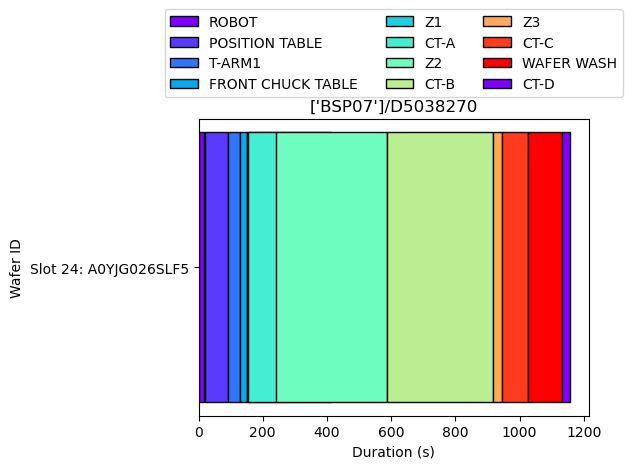

In [46]:
for i in range(len(DF1)):
    start_time = DF1.START_TIME[i]
    end_time = DF1.END_TIME[i]
    chamber = DF1.CHAMBER[i]
    start_sec = (start_time - base_time).total_seconds()
    duration = (end_time - start_time).total_seconds()
    
    plt.barh(y_label, duration, left=start_sec,
             color=color_map[chamber], edgecolor='k',
             label=chamber)
    
    plt.legend(unique_chambers, loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=3)
    plt.title(f'{unique_entities}/{lot}')
    plt.xlabel('Duration (s)')
    plt.ylabel('Wafer ID')

    plt.tight_layout()

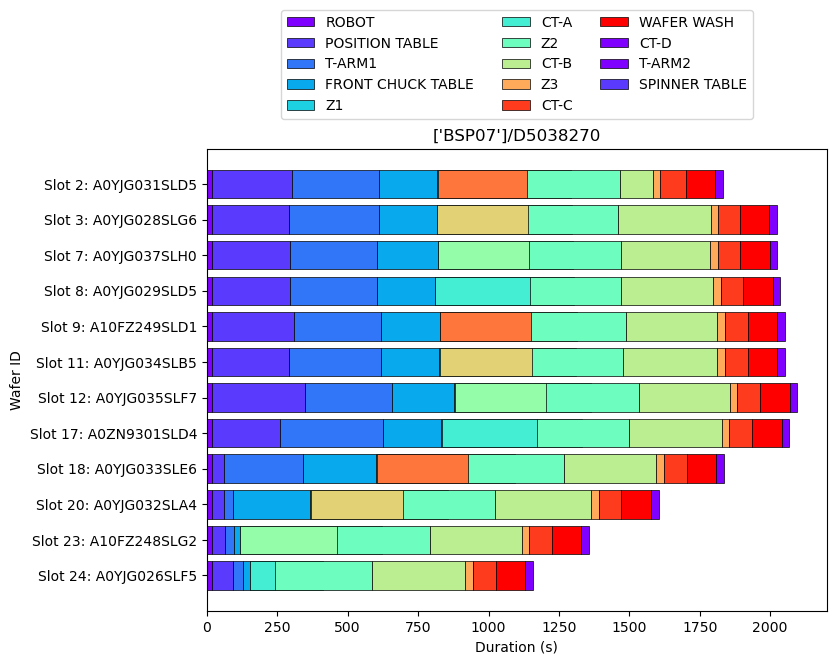

In [47]:
unique_wafers = waferChamberHistory.WAFER_ID.unique()
plt.figure(figsize=(8,6))
for wafer in unique_wafers:
    DF1 = waferChamberHistory[waferChamberHistory.WAFER_ID == wafer].reset_index(drop=True)
    base_time = DF1.START_TIME[0]
    y_label = f"Slot {DF1.SLOT[0]}: {wafer}"
    
    
    for i in range(len(DF1)):
        start_time = DF1.START_TIME[i]
        end_time = DF1.END_TIME[i]
        chamber = DF1.CHAMBER[i]
        start_sec = (start_time - base_time).total_seconds()
        duration = (end_time - start_time).total_seconds()
        
        plt.barh(y_label, duration, left=start_sec,
                 color=color_map[chamber], edgecolor='k',
                 linewidth=0.5,
                 label=chamber)
        plt.title(f"{unique_entities}/{lot}")
        plt.xlabel('Duration (s)')
        plt.ylabel('Wafer ID')
        # plt.legend(unique_chambers, loc='lower_center', bbox_to_anchor=(0.5, 1.05), ncol=3)
        plt.legend(unique_chambers, loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=3)
        plt.tight_layout

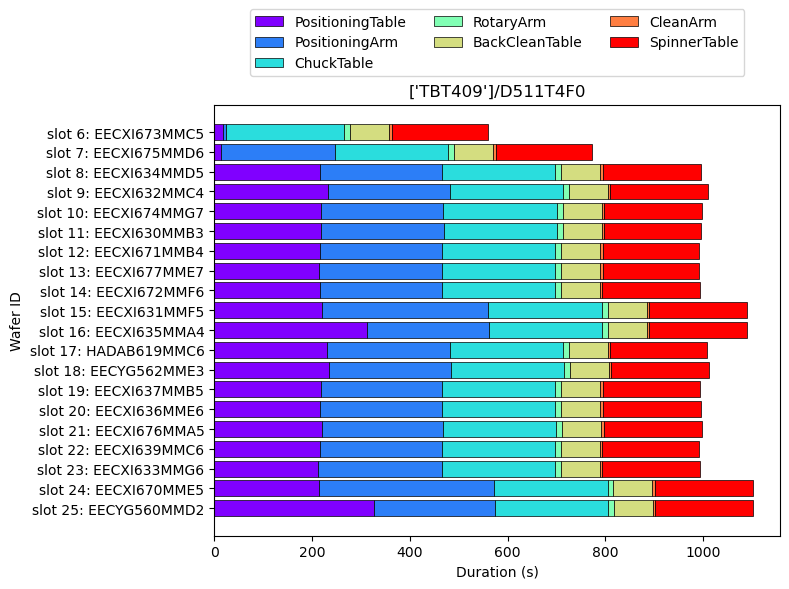

In [56]:
#Sort wafer IDs by their SLOT in descending order so that the wafer with the smallest slot (first wafer) is plotted last
unique_wafers_df = waferChamberHistory[['WAFER_ID', 'SLOT']].drop_duplicates().sort_values('SLOT', ascending=False)
plt.figure(figsize=(8,6))
for wafer in unique_wafers_df['WAFER_ID']:
    DF = waferChamberHistory[waferChamberHistory.WAFER_ID == wafer].reset_index(drop=True)
    base_time = DF.START_TIME[0]
    y_label = f"slot {DF.SLOT[0]}: {wafer}"
    
    for I in range(len(DF)):
        start_time = DF.START_TIME[I]
        end_time = DF.END_TIME[I]
        chamber = DF.CHAMBER[I]
        start_sec = (start_time - base_time).total_seconds()
        duration = (end_time - start_time).total_seconds()
        
        plt.barh(y_label, duration, left=start_sec,
                 color=color_map[chamber], edgecolor='k', linewidth=0.5,
                 label=chamber)
        plt.legend(unique_chambers, loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=3)
        plt.title(f"{unique_entities}/{lot}")
        plt.xlabel('Duration (s)')
        plt.ylabel('Wafer ID')
        plt.tight_layout()

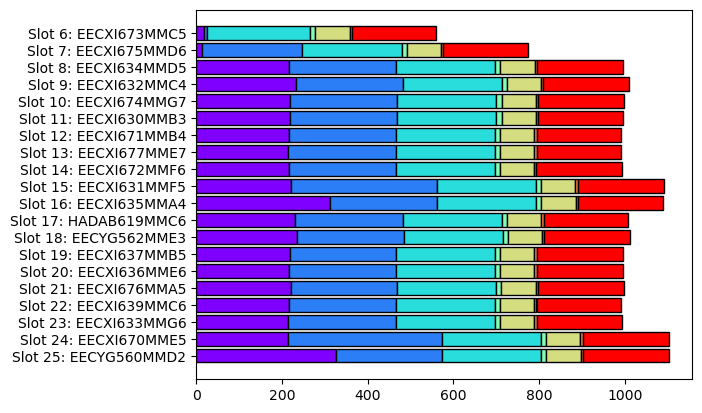

In [ ]:
#Optimized code, here using first

waferChamberHistory['base_time'] = waferChamberHistory.groupby('WAFER_ID')['START_TIME'].transform('first')
waferChamberHistory['start_sec'] = (waferChamberHistory['START_TIME'] - waferChamberHistory['base_time']).dt.total_seconds()
waferChamberHistory['duration'] = (waferChamberHistory['END_TIME'] - waferChamberHistory['START_TIME']).dt.total_seconds()

#Order wafers based on their SLOT in descending order
unique_wafers_df = waferChamberHistory[['WAFER_ID', 'SLOT']].drop_duplicates().sort_values('SLOT', ascending=False)

#Loop only over wafers groups and plt all bars for each wafer at once (vectorized per group)
for wafer in unique_wafers_df['WAFER_ID']:
    wafer_group = waferChamberHistory[waferChamberHistory.WAFER_ID == wafer]
    y_label = f"Slot {wafer_group.SLOT.iloc[0]}: {wafer}"
    plt.barh(
        y_label,
        wafer_group['duration'],
        left = wafer_group['start_sec'],
        color=wafer_group['CHAMBER'].map(color_map),
        edgecolor='k'
    )

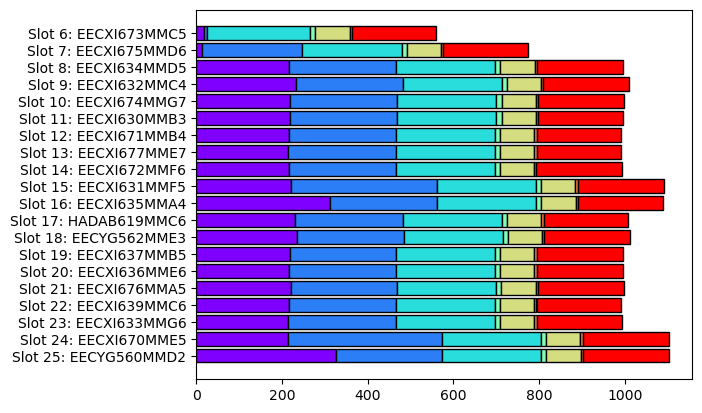

In [74]:
#Optimized code

waferChamberHistory['base_time'] = waferChamberHistory.groupby('WAFER_ID')['START_TIME'].transform('min')
waferChamberHistory['start_sec'] = (waferChamberHistory['START_TIME'] - waferChamberHistory['base_time']).dt.total_seconds()
waferChamberHistory['duration'] = (waferChamberHistory['END_TIME'] - waferChamberHistory['START_TIME']).dt.total_seconds()

#Order wafers based on their SLOT in descending order
unique_wafers_df = waferChamberHistory[['WAFER_ID', 'SLOT']].drop_duplicates().sort_values('SLOT', ascending=False)

#Loop only over wafers groups and plt all bars for each wafer at once (vectorized per group)
for wafer in unique_wafers_df['WAFER_ID']:
    wafer_group = waferChamberHistory[waferChamberHistory.WAFER_ID == wafer]
    y_label = f"Slot {wafer_group.SLOT.iloc[0]}: {wafer}"
    plt.barh(
        y_label,
        wafer_group['duration'],
        left = wafer_group['start_sec'],
        color=wafer_group['CHAMBER'].map(color_map),
        edgecolor='k'
    )

In [63]:
waferChamberHistory.head()

,SITE,RUNKEY,BATCH_ID,LOTOPERKEY,LOT,OPERATION,ROUTE,WAFER_ID,SLOT,START_TIME,END_TIME,STATE,ENTITY,CHAMBER,ENTITY_CHAMBER,SUBENTITY,SUB_OPERATION,CHAMBER_SEQUENCE,PROCESS_ORDER,PROCESS_TIME,IN_SUITCASE_FLAG,LOT_RECIPE,WAFER_RECIPE,CHAMBER_RECIPE,ATTRIBUTES,PRODUCT,LAST_TXN_TIME
123,D1D,202511.146547,710808529.0,5.581339e+09,D511T4F0,192229,VC78.017,EECXI673MMC5,6,2025-03-12 21:30:22.558,2025-03-12 21:30:39.958,Completed,TBT409,PositioningTable,TBT409_PositioningTable,None,Table-1,1.0,1.0,0.29,N,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,None,NOPROD 0,2025-03-12 23:05:37.566
122,D1D,202511.146547,710808529.0,5.581339e+09,D511T4F0,192229,VC78.017,EECXI673MMC5,6,2025-03-12 21:30:39.985,2025-03-12 21:30:46.873,Completed,TBT409,PositioningArm,TBT409_PositioningArm,None,Arm-1,2.0,1.0,0.11,N,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,None,NOPROD 0,2025-03-12 23:05:37.566
120,D1D,202511.146547,710808529.0,5.581339e+09,D511T4F0,192229,VC78.017,EECXI673MMC5,6,2025-03-12 21:30:46.894,2025-03-12 21:34:48.114,Completed,TBT409,ChuckTable,TBT409_ChuckTable,None,Table-2,3.0,1.0,4.02,N,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,None,NOPROD 0,2025-03-12 23:05:37.566
130,D1D,202511.146547,710808529.0,5.581339e+09,D511T4F0,192229,VC78.017,EECXI675MMD6,7,2025-03-12 21:31:08.946,2025-03-12 21:31:23.159,Completed,TBT409,PositioningTable,TBT409_PositioningTable,None,Table-1,1.0,2.0,0.24,N,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,None,NOPROD 0,2025-03-12 23:05:37.566
129,D1D,202511.146547,710808529.0,5.581339e+09,D511T4F0,192229,VC78.017,EECXI675MMD6,7,2025-03-12 21:31:23.180,2025-03-12 21:35:16.545,Completed,TBT409,PositioningArm,TBT409_PositioningArm,None,Arm-1,2.0,2.0,3.89,N,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,None,NOPROD 0,2025-03-12 23:05:37.566


In [ ]:
waferChamberHistory

In [ ]:
# #The missing values from the start time has been dropped
# len(waferChamberHistory)

140

In [ ]:
# # Sort data by START_TIME
# waferChamberHistory.sort_values(by='START_TIME', inplace=True)

In [ ]:
# unique_chambers = waferChamberHistory['CHAMBER'].unique()
# unique_chambers

array(['PositioningTable', 'PositioningArm', 'ChuckTable', 'RotaryArm',
       'BackCleanTable', 'CleanArm', 'SpinnerTable'], dtype=object)

In [ ]:
# len(unique_chambers)

7

In [ ]:
# colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_chambers)))
# colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.70588235e-01, 4.94655843e-01, 9.66718404e-01, 1.00000000e+00],
       [1.66666667e-01, 8.66025404e-01, 8.66025404e-01, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [8.33333333e-01, 8.66025404e-01, 5.00000000e-01, 1.00000000e+00],
       [1.00000000e+00, 4.94655843e-01, 2.55842778e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

In [ ]:
# pd.DataFrame(colors).value_counts()

0         1             2             3  
0.166667  8.660254e-01  8.660254e-01  1.0    1
0.170588  4.946558e-01  9.667184e-01  1.0    1
0.500000  0.000000e+00  1.000000e+00  1.0    1
0.503922  9.999810e-01  7.049255e-01  1.0    1
0.833333  8.660254e-01  5.000000e-01  1.0    1
1.000000  1.224647e-16  6.123234e-17  1.0    1
          4.946558e-01  2.558428e-01  1.0    1
dtype: int64

In [ ]:
# colors.shape

(7, 4)

In [ ]:
# test = zip(unique_chambers, colors)
# test

In [38]:
unique_chambers = waferChamberHistory['CHAMBER'].unique()
color_map=dict(zip(unique_chambers, colors))
color_map

{'PositioningTable': array([0.5, 0. , 1. , 1. ]),
 'PositioningArm': array([0.17058824, 0.49465584, 0.9667184 , 1.        ]),
 'ChuckTable': array([0.16666667, 0.8660254 , 0.8660254 , 1.        ]),
 'RotaryArm': array([0.50392157, 0.99998103, 0.70492555, 1.        ]),
 'BackCleanTable': array([0.83333333, 0.8660254 , 0.5       , 1.        ]),
 'CleanArm': array([1.        , 0.49465584, 0.25584278, 1.        ]),
 'SpinnerTable': array([1.0000000e+00, 1.2246468e-16, 6.1232340e-17, 1.0000000e+00])}

In [ ]:
# plotted_chambers = set()

In [ ]:
# waferChamberHistory.head(2)

,SITE,RUNKEY,BATCH_ID,LOTOPERKEY,LOT,OPERATION,ROUTE,WAFER_ID,SLOT,START_TIME,END_TIME,STATE,ENTITY,CHAMBER,ENTITY_CHAMBER,SUBENTITY,SUB_OPERATION,CHAMBER_SEQUENCE,PROCESS_ORDER,PROCESS_TIME,IN_SUITCASE_FLAG,LOT_RECIPE,WAFER_RECIPE,CHAMBER_RECIPE,ATTRIBUTES,PRODUCT,LAST_TXN_TIME
123,D1D,202511.146547,710808529.0,5.581339e+09,D511T4F0,192229,VC78.017,EECXI673MMC5,6,2025-03-12 21:30:22.558,2025-03-12 21:30:39.958,Completed,TBT409,PositioningTable,TBT409_PositioningTable,None,Table-1,1.0,1.0,0.29,N,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,None,NOPROD 0,2025-03-12 23:05:37.566
122,D1D,202511.146547,710808529.0,5.581339e+09,D511T4F0,192229,VC78.017,EECXI673MMC5,6,2025-03-12 21:30:39.985,2025-03-12 21:30:46.873,Completed,TBT409,PositioningArm,TBT409_PositioningArm,None,Arm-1,2.0,1.0,0.11,N,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,None,NOPROD 0,2025-03-12 23:05:37.566


In [ ]:
# for index, row in waferChamberHistory.iterrows():
#     start_time = row['START_TIME']
#     print(start_time)

2025-03-12 21:30:22.558000
2025-03-12 21:30:39.985000
2025-03-12 21:30:46.894000
2025-03-12 21:31:08.946000
2025-03-12 21:31:23.180000
2025-03-12 21:31:50.612000
2025-03-12 21:34:48.141000
2025-03-12 21:35:00.266000
2025-03-12 21:35:16.571000
2025-03-12 21:35:27.483000
2025-03-12 21:35:54.993000
2025-03-12 21:36:20.416000
2025-03-12 21:36:25.635000
2025-03-12 21:39:07.966000
2025-03-12 21:39:19.962000
2025-03-12 21:39:36.352000
2025-03-12 21:39:48.584000
2025-03-12 21:40:27.521000
2025-03-12 21:40:39.904000
2025-03-12 21:40:45.130000
2025-03-12 21:43:28.084000
2025-03-12 21:43:40.096000
2025-03-12 21:43:56.367000
2025-03-12 21:44:06.676000
2025-03-12 21:44:47.175000
2025-03-12 21:45:00.039000
2025-03-12 21:45:05.304000
2025-03-12 21:47:47.761000
2025-03-12 21:47:59.805000
2025-03-12 21:48:16.241000
2025-03-12 21:48:24.896000
2025-03-12 21:49:10.247000
2025-03-12 21:49:19.754000
2025-03-12 21:49:25.015000
2025-03-12 21:52:07.907000
2025-03-12 21:52:19.880000
2025-03-12 21:52:36.250000
2

In [ ]:
entity=unique_entities

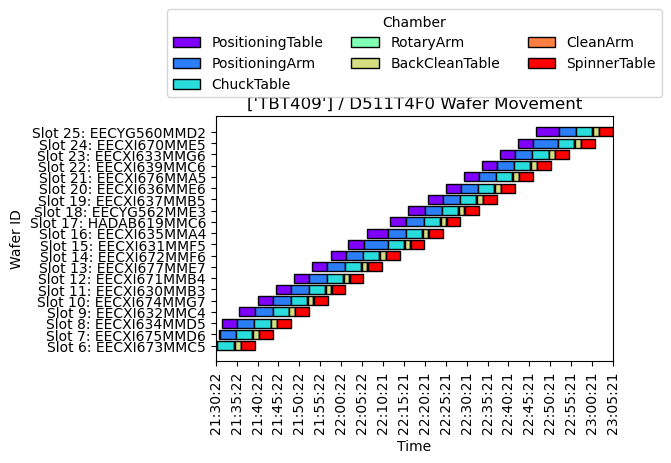

In [ ]:

for index, row in waferChamberHistory.iterrows():
    start_time = row['START_TIME']
    end_time = row['END_TIME']
    wafer_id = row['WAFER_ID']
    slot = row['SLOT']
    chamber = row['CHAMBER']
        
        # Combine slot and wafer_id for the y-axis label
    y_label = f"Slot {slot}: {wafer_id}"
        
        # Plot a horizontal bar with rainbow colors and black edge
    plt.barh(y_label, end_time - start_time, left=start_time,
                 color=color_map[chamber], edgecolor='black', 
                 label=chamber if chamber not in plotted_chambers else None)

        # Ensure each chamber is only added once to the legend
    plotted_chambers.add(chamber)
        
        
        # Titles and labels
plt.title(f'{entity} / {lot} Wafer Movement')  # Include entity in the title
plt.xlabel('Time')
plt.ylabel('Wafer ID')

    # Set custom ticks
start, end = waferChamberHistory['START_TIME'].min(), waferChamberHistory['END_TIME'].max()
tick_positions = np.linspace(date2num(start), date2num(end), 20)
plt.xticks(tick_positions)
plt.gca().set_xticklabels([num2date(pos).strftime('%Y-%m-%d %H:%M:%S') for pos in tick_positions])
plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

    # Add legend only for unique entries
plt.legend(title='Chamber', loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=3)

    # Rotate date labels for better readability
plt.xticks(rotation=90)

    # Apply tight layout
plt.tight_layout()

In [ ]:
# waferChamberHistory.head()

,SITE,RUNKEY,BATCH_ID,LOTOPERKEY,LOT,OPERATION,ROUTE,WAFER_ID,SLOT,START_TIME,END_TIME,STATE,ENTITY,CHAMBER,ENTITY_CHAMBER,SUBENTITY,SUB_OPERATION,CHAMBER_SEQUENCE,PROCESS_ORDER,PROCESS_TIME,IN_SUITCASE_FLAG,LOT_RECIPE,WAFER_RECIPE,CHAMBER_RECIPE,ATTRIBUTES,PRODUCT,LAST_TXN_TIME
123,D1D,202511.146547,710808529.0,5.581339e+09,D511T4F0,192229,VC78.017,EECXI673MMC5,6,2025-03-12 21:30:22.558,2025-03-12 21:30:39.958,Completed,TBT409,PositioningTable,TBT409_PositioningTable,None,Table-1,1.0,1.0,0.29,N,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,None,NOPROD 0,2025-03-12 23:05:37.566
122,D1D,202511.146547,710808529.0,5.581339e+09,D511T4F0,192229,VC78.017,EECXI673MMC5,6,2025-03-12 21:30:39.985,2025-03-12 21:30:46.873,Completed,TBT409,PositioningArm,TBT409_PositioningArm,None,Arm-1,2.0,1.0,0.11,N,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,None,NOPROD 0,2025-03-12 23:05:37.566
120,D1D,202511.146547,710808529.0,5.581339e+09,D511T4F0,192229,VC78.017,EECXI673MMC5,6,2025-03-12 21:30:46.894,2025-03-12 21:34:48.114,Completed,TBT409,ChuckTable,TBT409_ChuckTable,None,Table-2,3.0,1.0,4.02,N,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,None,NOPROD 0,2025-03-12 23:05:37.566
130,D1D,202511.146547,710808529.0,5.581339e+09,D511T4F0,192229,VC78.017,EECXI675MMD6,7,2025-03-12 21:31:08.946,2025-03-12 21:31:23.159,Completed,TBT409,PositioningTable,TBT409_PositioningTable,None,Table-1,1.0,2.0,0.24,N,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,None,NOPROD 0,2025-03-12 23:05:37.566
129,D1D,202511.146547,710808529.0,5.581339e+09,D511T4F0,192229,VC78.017,EECXI675MMD6,7,2025-03-12 21:31:23.180,2025-03-12 21:35:16.545,Completed,TBT409,PositioningArm,TBT409_PositioningArm,None,Arm-1,2.0,2.0,3.89,N,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,PROD\P78-2700SC-LPD-TW,None,NOPROD 0,2025-03-12 23:05:37.566


In [54]:
#Focusing on the first unique WAFER ID. This way I could have better control of the timing
DF1 = waferChamberHistory[waferChamberHistory.WAFER_ID == waferChamberHistory.WAFER_ID.unique()[0]].reset_index(drop=True)

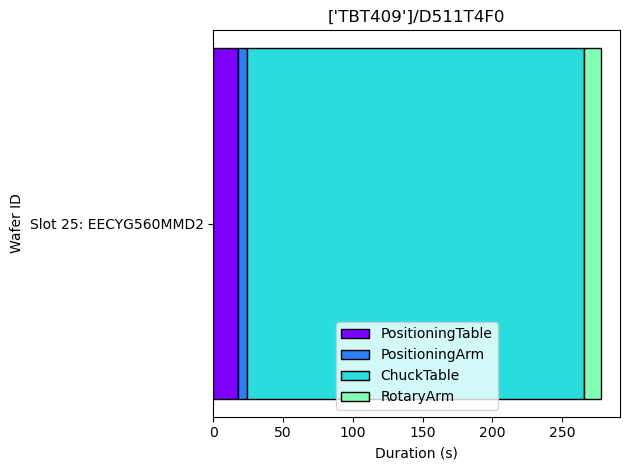

In [ ]:



#Focusing on the first unique WAFER ID. This way I could have better control of the timing
DF1 = waferChamberHistory[waferChamberHistory.WAFER_ID == waferChamberHistory.WAFER_ID.unique()[0]].reset_index(drop=True)

#First observation
START_TIME = DF1.START_TIME[0]
END_TIME = DF1.END_TIME[0]
WAFER_ID = DF1.WAFER_ID[0]
SLOT = DF1.SLOT[0]
CHAMBER = DF1.CHAMBER[0]

#Normalizing the data. Setting the initial time as 0 seconds
base_time =  START_TIME
start_sec = (START_TIME - base_time).total_seconds() 
duration = (END_TIME - START_TIME).total_seconds()

#################################################################
#################################################################
#Second observation
START_TIME_1 = DF1.START_TIME[1]
END_TIME_1 = DF1.END_TIME[1]
CHAMBER_1 = DF1.CHAMBER[1]

#Wanting the barplot to begin after the first chamber is completed
start_sec_1 = (START_TIME_1 - base_time).total_seconds() 
duration_1 = (END_TIME_1 - START_TIME_1).total_seconds()


#################################################################
#################################################################
#Third observation
START_TIME_2 = DF1.START_TIME[2]
END_TIME_2 = DF1.END_TIME[2]
CHAMBER_2 = DF1.CHAMBER[2]

#Wanting the barplot to begin after the first chamber is completed
start_sec_2 = (START_TIME_2 - base_time).total_seconds() 
duration_2 = (END_TIME_2 - START_TIME_2).total_seconds()

#################################################################
#################################################################
#Fourth observation
START_TIME_3 = DF1.START_TIME[3]
END_TIME_3 = DF1.END_TIME[3]
CHAMBER_3 = DF1.CHAMBER[3]

#Wanting the barplot to begin after the first chamber is completed
start_sec_3 = (START_TIME_3 - base_time).total_seconds() 
duration_3 = (END_TIME_3 - START_TIME_3).total_seconds()

plt.barh(y_label, duration, left=start_sec,
         color=color_map[CHAMBER], edgecolor='k',
         label=CHAMBER)
#################################################################
#################################################################
plt.barh(y_label, duration_1, left=start_sec_1,
         color=color_map[CHAMBER_1], edgecolor='k',
         label=CHAMBER_1)
#################################################################
#################################################################
plt.barh(y_label, duration_2, left=start_sec_2,
         color=color_map[CHAMBER_2], edgecolor='k',
         label=CHAMBER_2)
#################################################################
#################################################################
plt.barh(y_label, duration_3, left=start_sec_3,
         color=color_map[CHAMBER_3], edgecolor='k',
         label=CHAMBER_3)



plt.legend()
plt.title(f'{entity}/{lot}')
plt.xlabel('Duration (s)')
plt.ylabel('Wafer ID')

plt.tight_layout() 

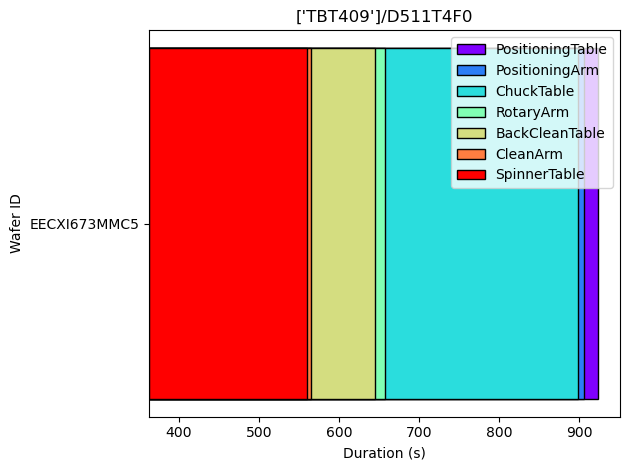

In [108]:
base_time = DF1.START_TIME[0]
y_label_set = set() 

for i in range(len(DF1)):
    
    START_TIME = DF1.START_TIME[i]
    END_TIME - DF1.END_TIME[i]
    WAFER_ID = DF1.WAFER_ID[i]
    SLOT = DF1.SLOT[i]
    CHAMBER = DF1.CHAMBER[i]
    
    start_sc = (START_TIME - base_time).total_seconds()
    duration = (END_TIME - START_TIME).total_seconds()
    
    y_label_set.add(WAFER_ID)
    
    plt.barh(WAFER_ID, duration, left=start_sec,
             color=color_map[CHAMBER],
             edgecolor='k',
             label=CHAMBER)
    
y_labels = sorted(y_label_set)

plt.legend()
plt.title(f'{entity}/{lot}')
plt.xlabel('Duration (s)')
plt.ylabel('Wafer ID')
plt.yticks(ticks = range(len(y_labels)), labels=y_labels)
plt.tight_layout()
plt.show()

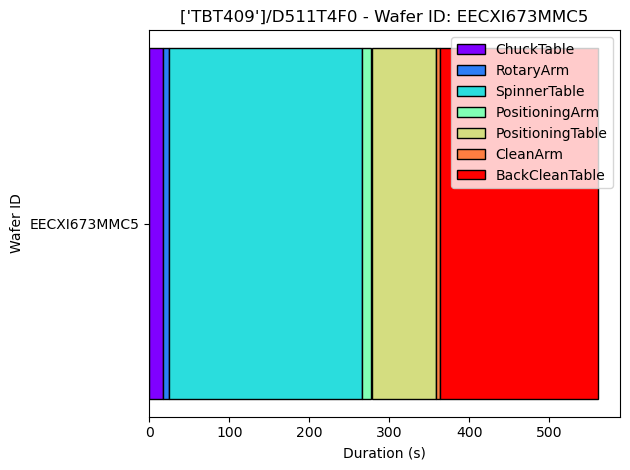

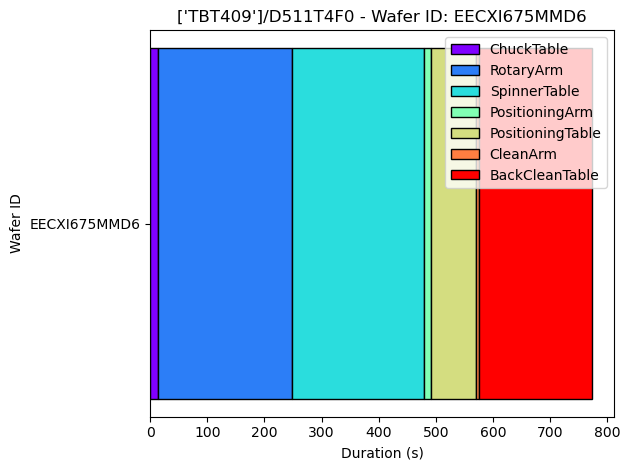

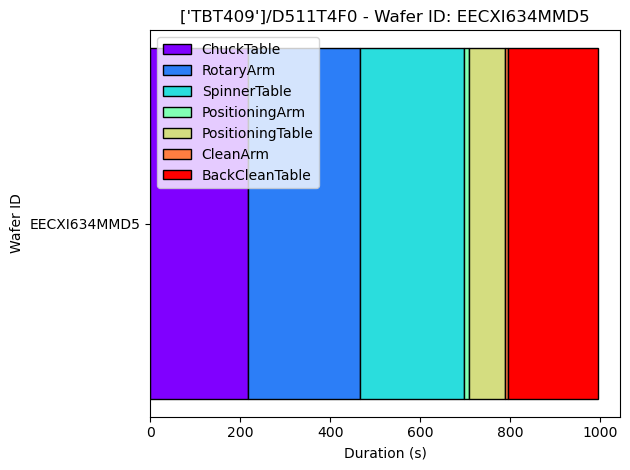

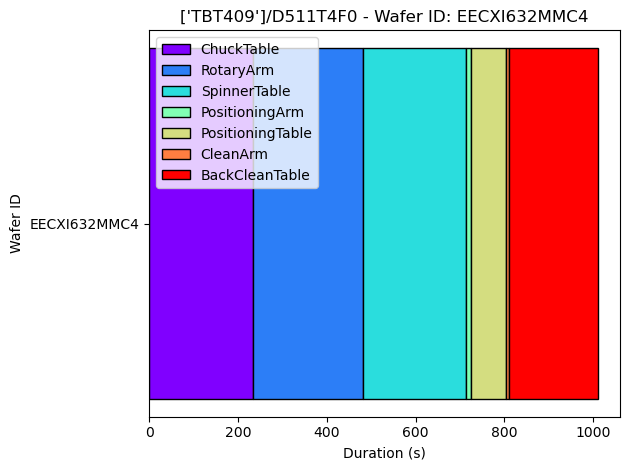

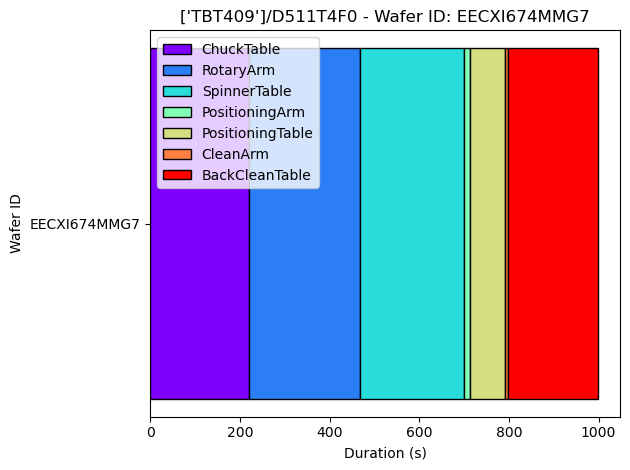

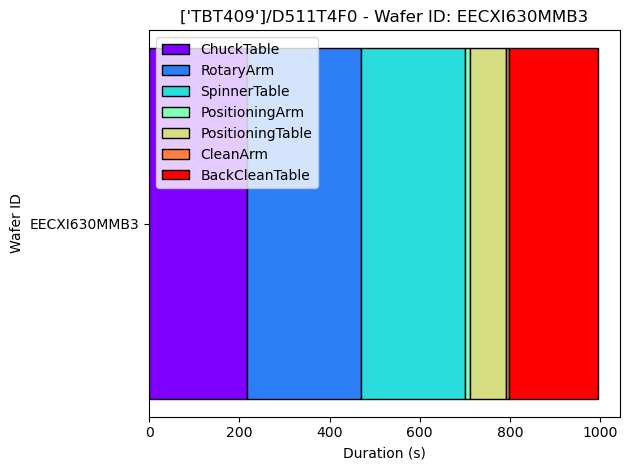

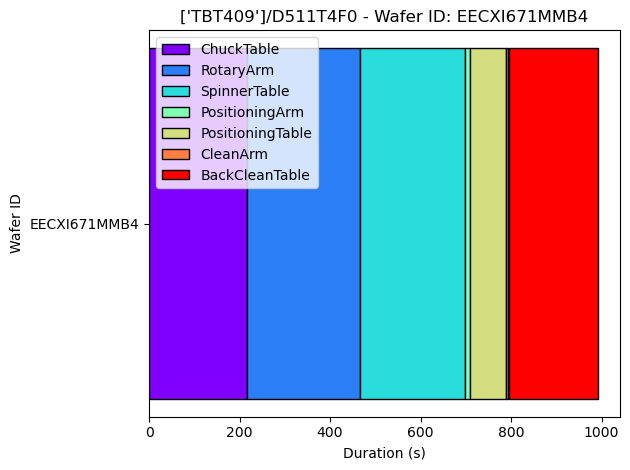

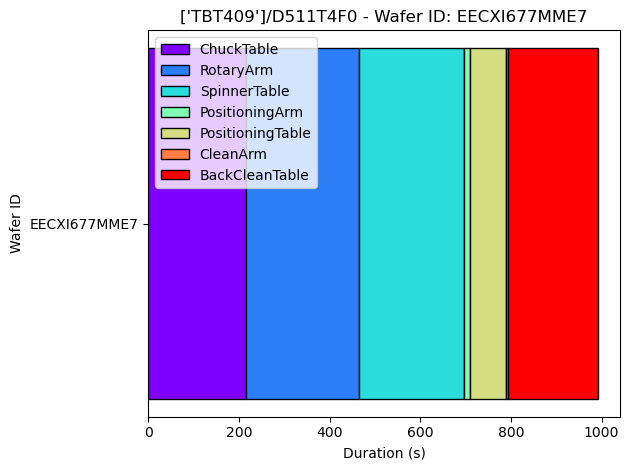

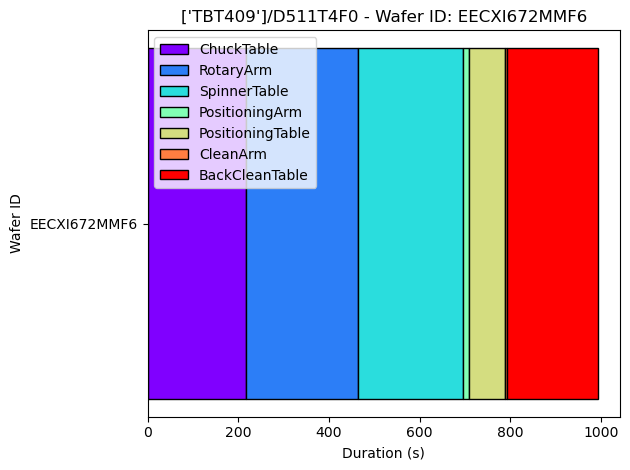

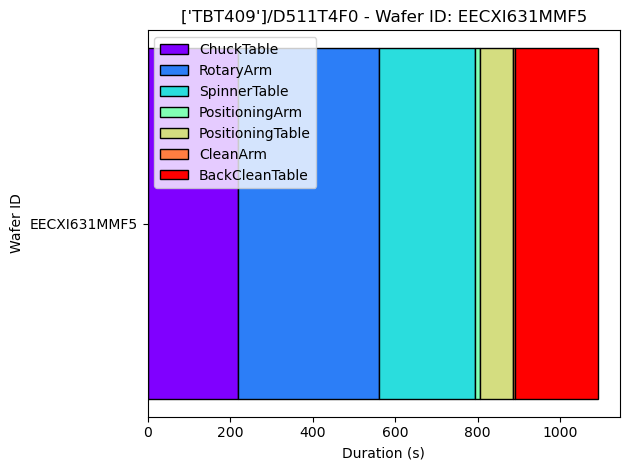

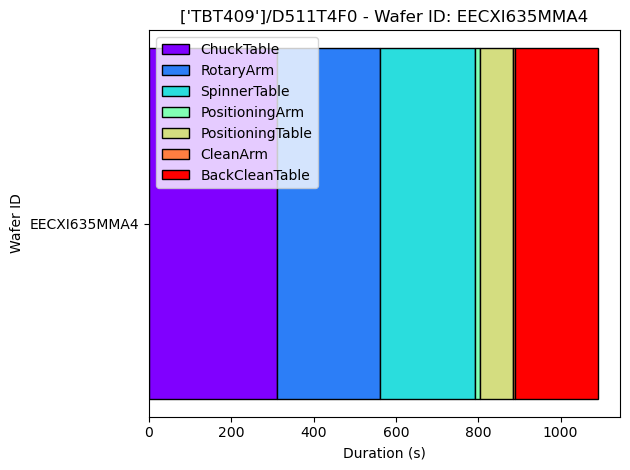

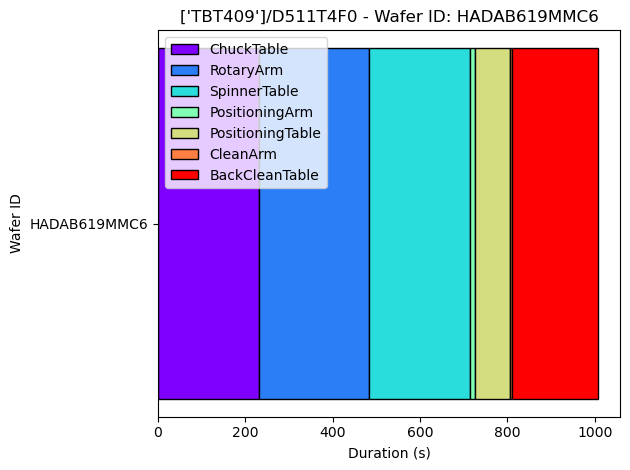

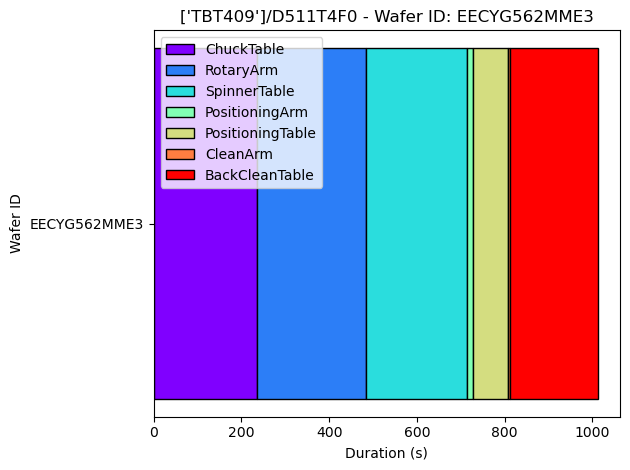

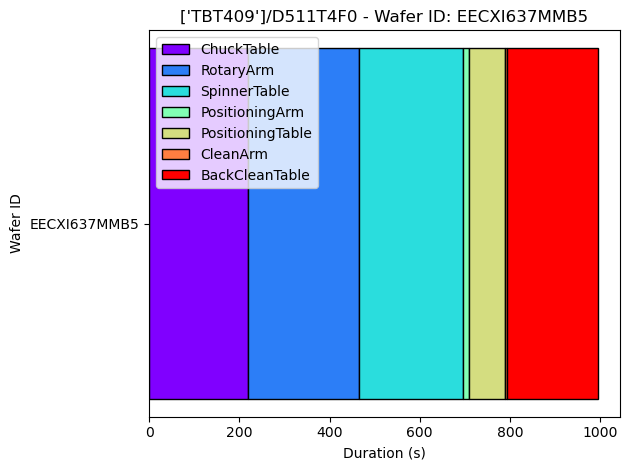

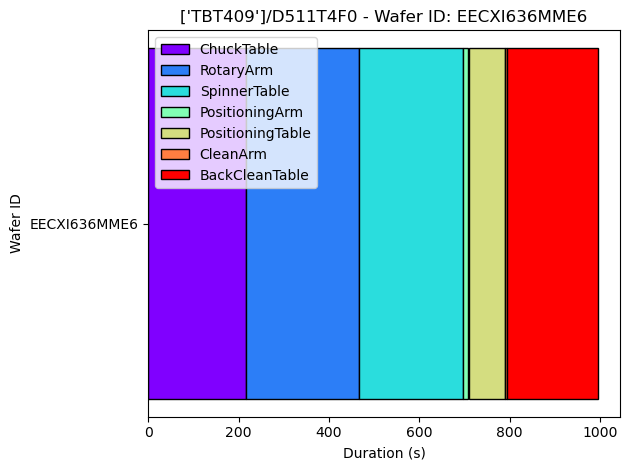

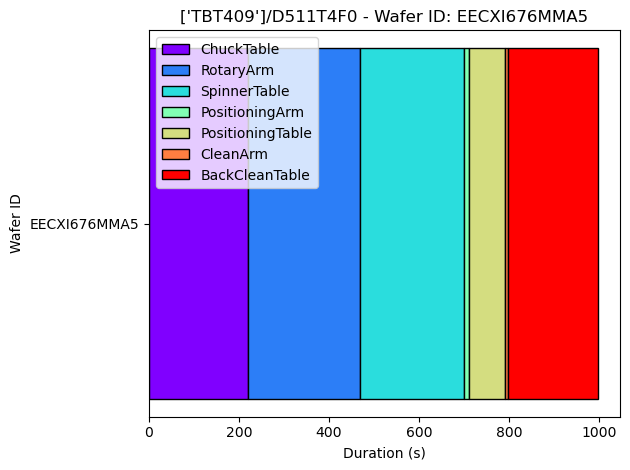

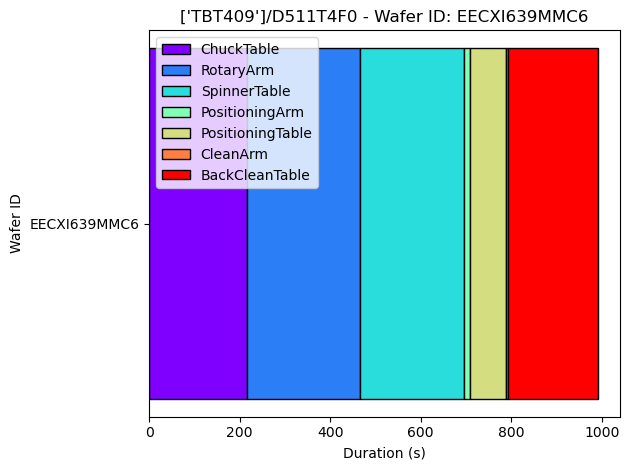

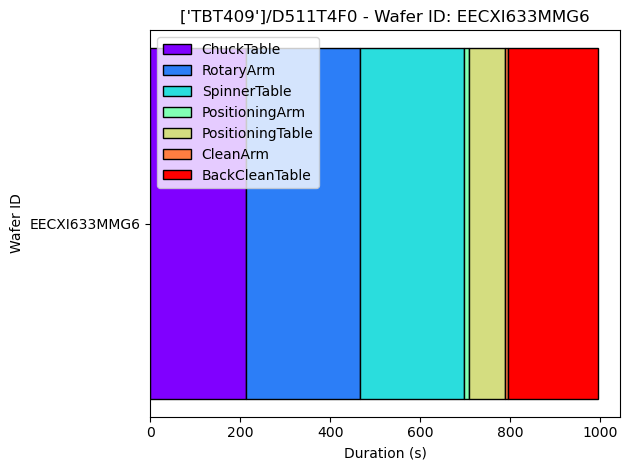

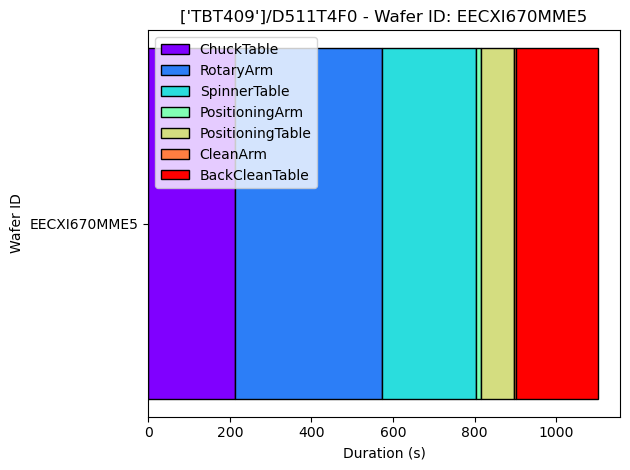

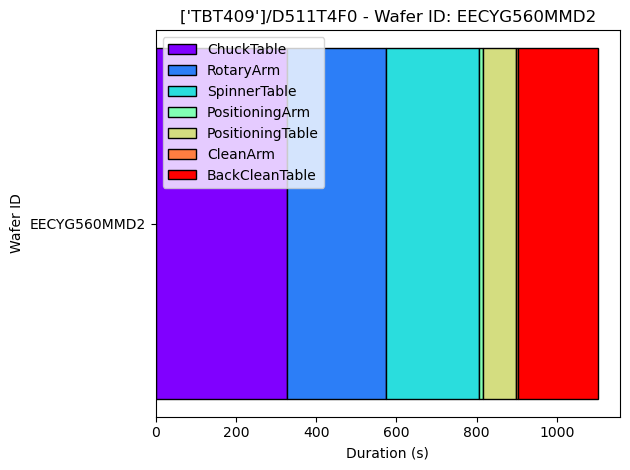

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming DF is your original DataFrame and color_map is a dictionary mapping chambers to colors

# Get unique wafer IDs
unique_wafer_ids = DF.WAFER_ID.unique()

# Iterate over each unique wafer ID
for wafer_id in unique_wafer_ids:
    # Filter the DataFrame for the current wafer ID
    DF1 = DF[DF.WAFER_ID == wafer_id].reset_index(drop=True)
    
    # Set the initial base time for normalization
    base_time = DF1.START_TIME[0]
    
    # Initialize a set for unique chambers for the legend
    unique_chambers = set()
    
    # Initialize variables to track consecutive processes
    combined_durations = []
    current_chamber = None
    current_start_sec = None
    current_duration = 0
    
    # Iterate over each index in the filtered DataFrame
    for i in range(len(DF1)):
        # Extract values for the current observation using index
        START_TIME = DF1.START_TIME[i]
        END_TIME = DF1.END_TIME[i]
        CHAMBER = DF1.CHAMBER[i]
        
        # Normalize the data
        start_sec = (START_TIME - base_time).total_seconds()
        duration = (END_TIME - START_TIME).total_seconds()
        
        # Check if the current chamber is the same as the previous one
        if CHAMBER == current_chamber:
            # Combine durations
            current_duration += duration
        else:
            # If not the same, plot the previous chamber's bar
            if current_chamber is not None:
                combined_durations.append((current_chamber, current_start_sec, current_duration))
            
            # Start a new chamber
            current_chamber = CHAMBER
            current_start_sec = start_sec
            current_duration = duration
        
        # Add chamber to the set for unique legend
        unique_chambers.add(CHAMBER)
    
    # Plot the last chamber's bar
    if current_chamber is not None:
        combined_durations.append((current_chamber, current_start_sec, current_duration))
    
    # Plot the bars for combined durations
    for chamber, start_sec, duration in combined_durations:
        plt.barh(wafer_id, duration, left=start_sec,
                 color=color_map[chamber], edgecolor='k',
                 label=chamber)
    
    # Configure the plot
    plt.legend(unique_chambers)  # Use the set to ensure unique legend entries
    plt.title(f'{entity}/{lot} - Wafer ID: {wafer_id}')
    plt.xlabel('Duration (s)')
    plt.ylabel('Wafer ID')
    plt.tight_layout()
    
    # Save the plot as an image
    # plt.savefig(f'wafer_{wafer_id}.png', format='png', dpi=300)
    
    # Show the plot
    plt.show()

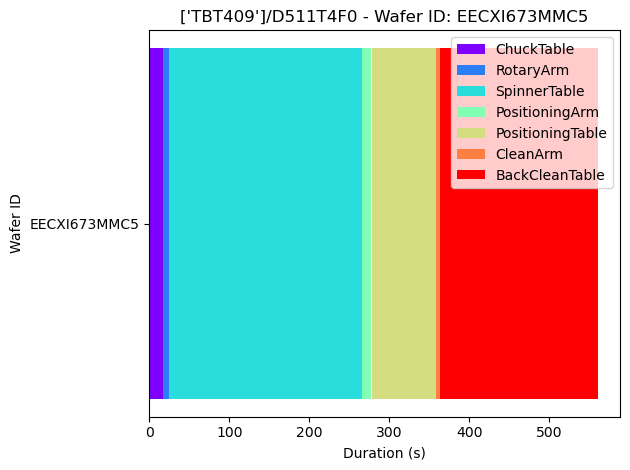

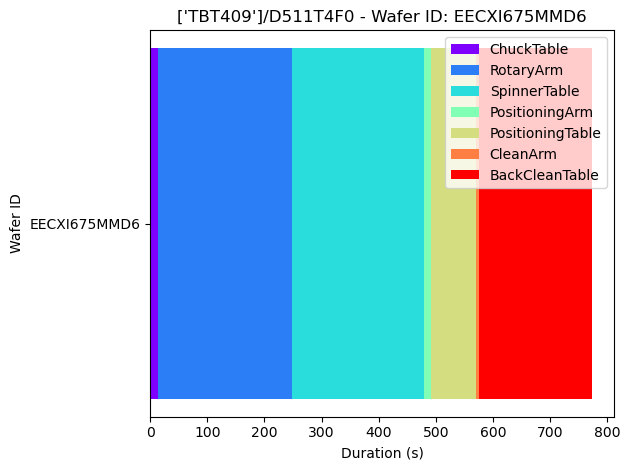

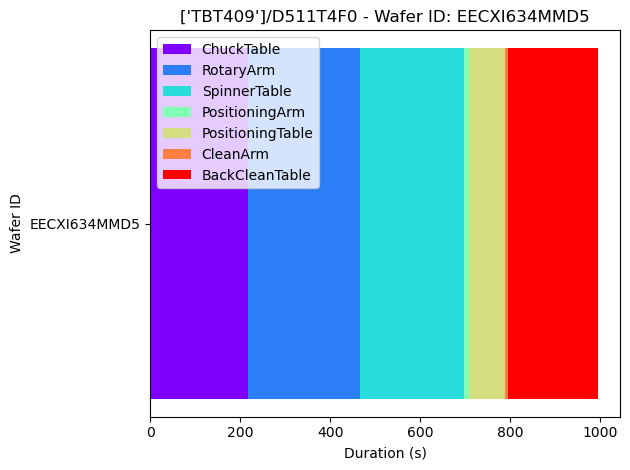

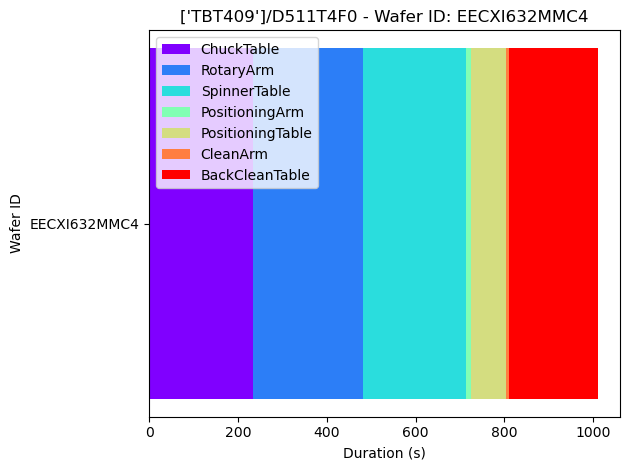

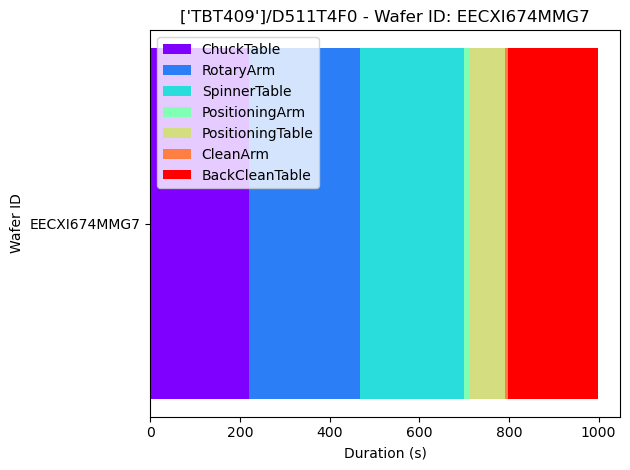

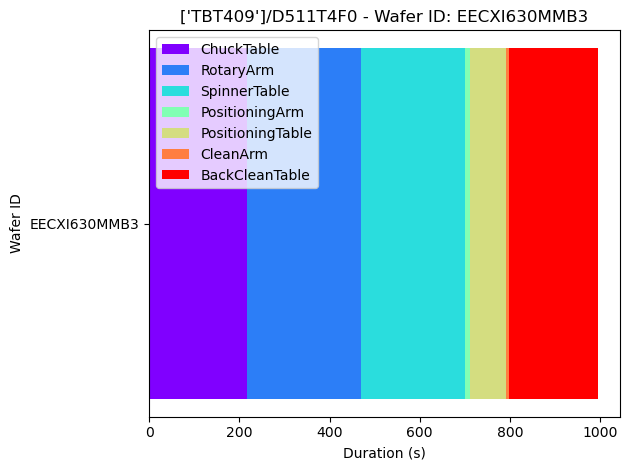

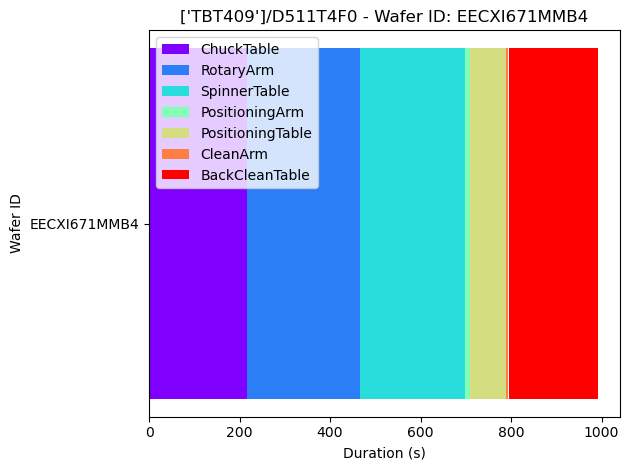

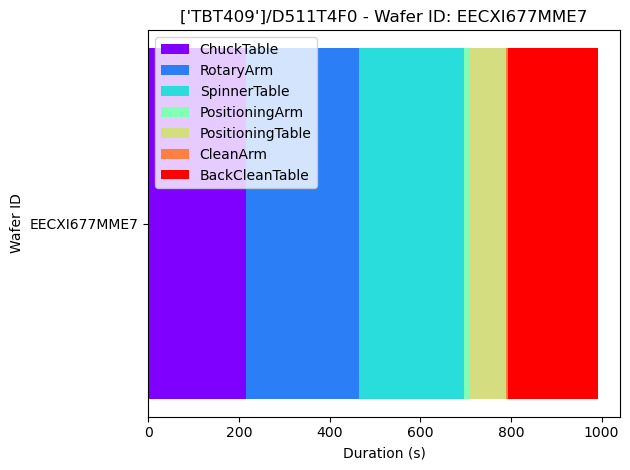

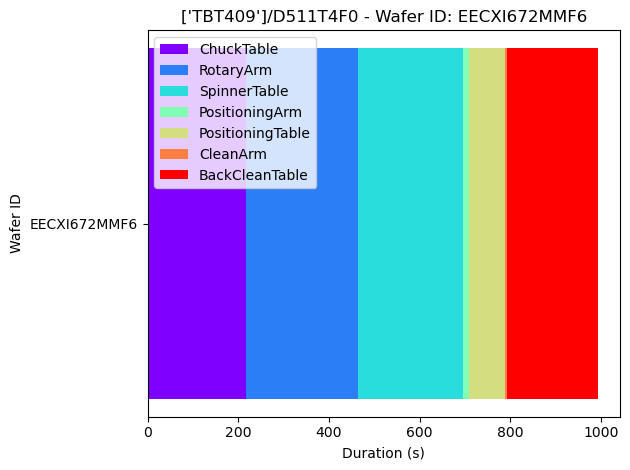

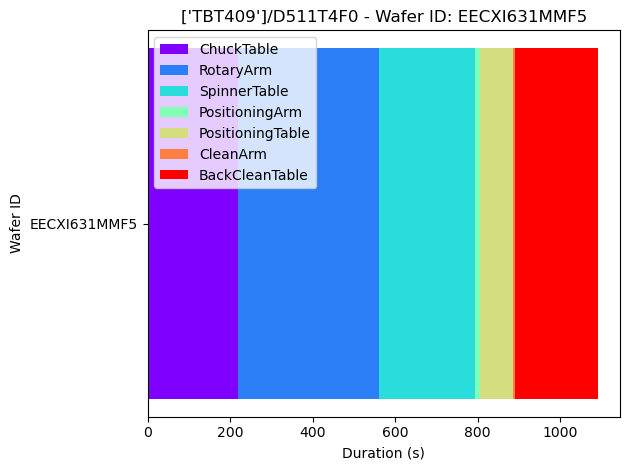

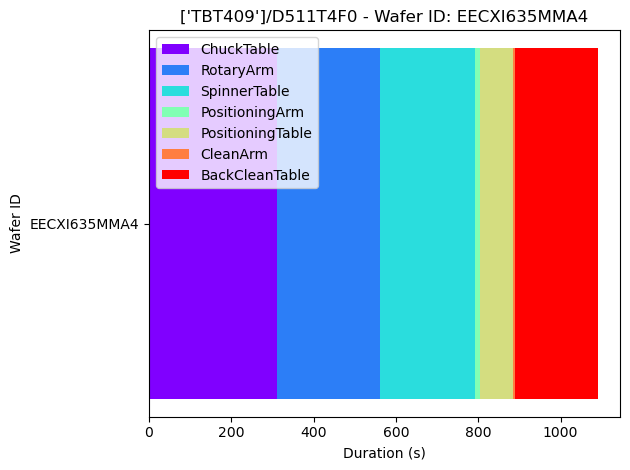

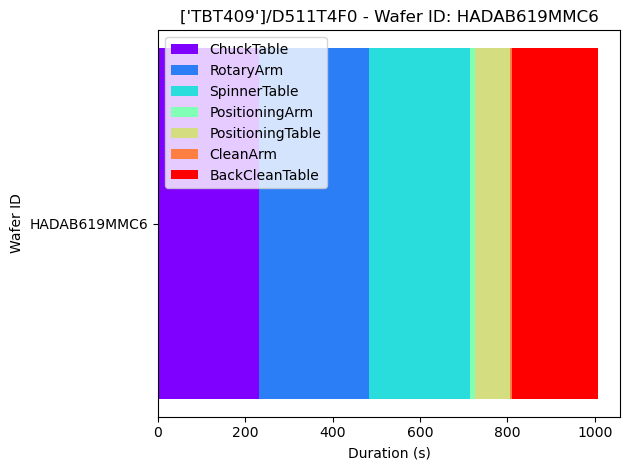

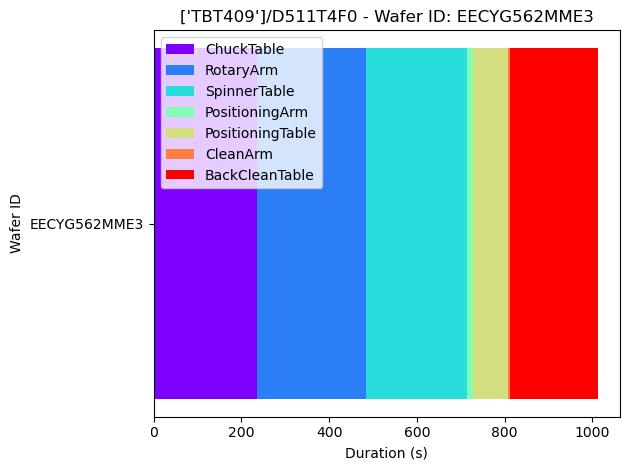

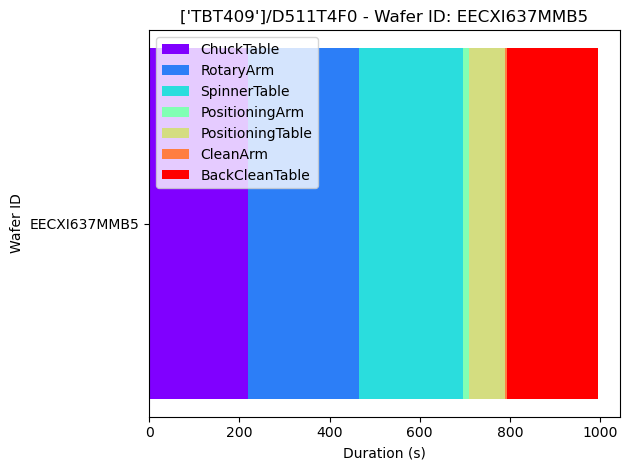

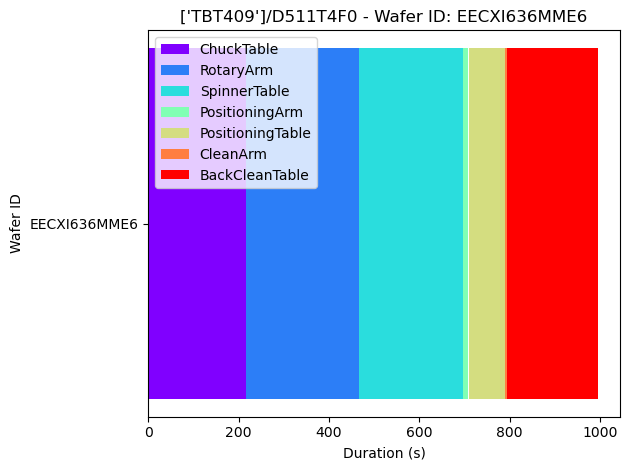

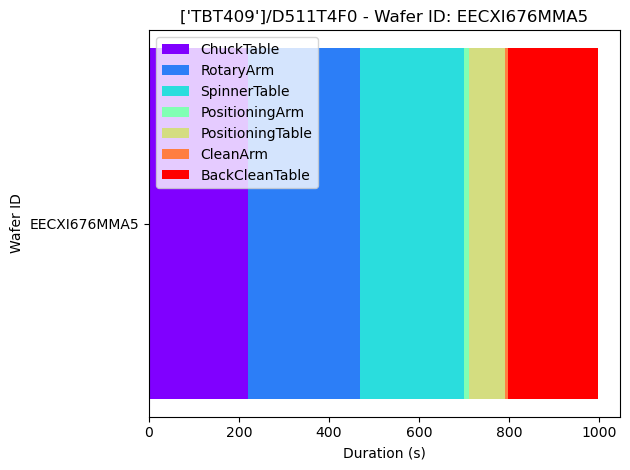

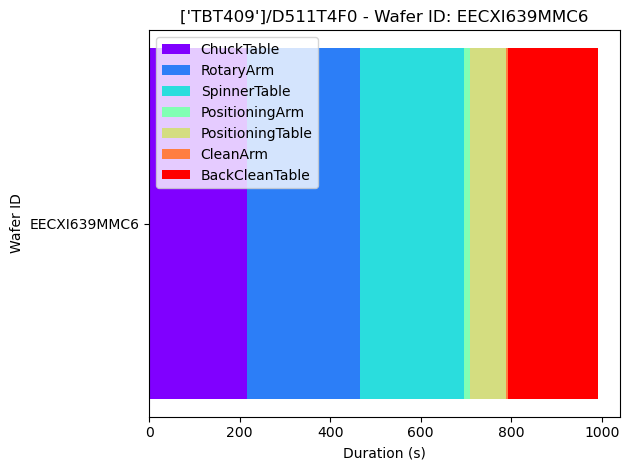

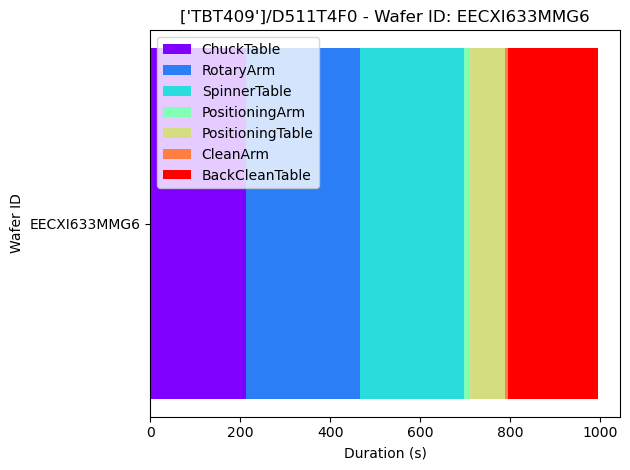

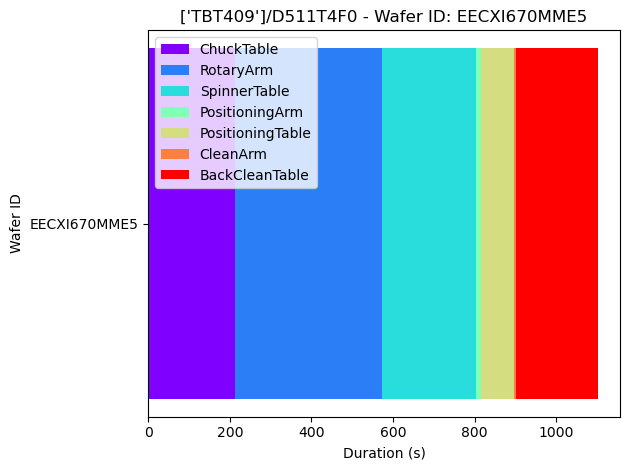

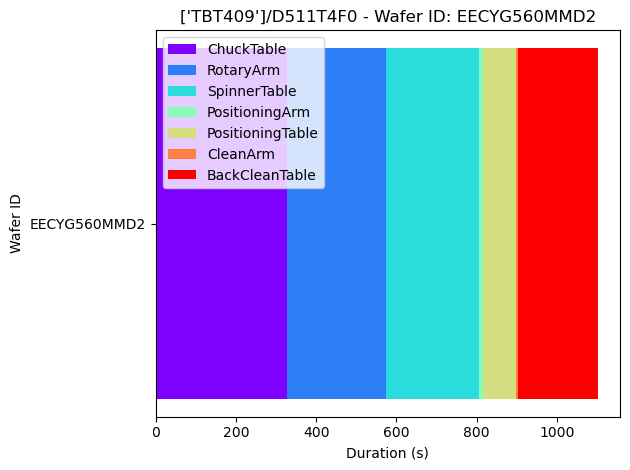

In [111]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming DF is your original DataFrame and color_map is a dictionary mapping chambers to colors

# Get unique wafer IDs
unique_wafer_ids = DF.WAFER_ID.unique()

# Iterate over each unique wafer ID
for wafer_id in unique_wafer_ids:
    # Filter the DataFrame for the current wafer ID
    DF1 = DF[DF.WAFER_ID == wafer_id].reset_index(drop=True)
    
    # Set the initial base time for normalization
    base_time = DF1.START_TIME[0]
    
    # Initialize a set for unique chambers for the legend
    unique_chambers = set()
    
    # Initialize variables to track consecutive processes
    combined_durations = []
    current_chamber = None
    current_start_sec = None
    current_duration = 0
    
    # Iterate over each index in the filtered DataFrame
    for i in range(len(DF1)):
        # Extract values for the current observation using index
        START_TIME = DF1.START_TIME[i]
        END_TIME = DF1.END_TIME[i]
        CHAMBER = DF1.CHAMBER[i]
        
        # Normalize the data
        start_sec = (START_TIME - base_time).total_seconds()
        duration = (END_TIME - START_TIME).total_seconds()
        
        # Check if the current chamber is the same as the previous one
        if CHAMBER == current_chamber:
            # Combine durations
            current_duration += duration
        else:
            # If not the same, plot the previous chamber's bar
            if current_chamber is not None:
                combined_durations.append((current_chamber, current_start_sec, current_duration))
            
            # Start a new chamber
            current_chamber = CHAMBER
            current_start_sec = start_sec
            current_duration = duration
        
        # Add chamber to the set for unique legend
        unique_chambers.add(CHAMBER)
    
    # Plot the last chamber's bar
    if current_chamber is not None:
        combined_durations.append((current_chamber, current_start_sec, current_duration))
    
    # Plot the bars for combined durations
    for chamber, start_sec, duration in combined_durations:
        plt.barh(wafer_id, duration, left=start_sec,
                 color=color_map[chamber],
                 label=chamber)
    
    # Configure the plot
    plt.legend(unique_chambers)  # Use the set to ensure unique legend entries
    plt.title(f'{entity}/{lot} - Wafer ID: {wafer_id}')
    plt.xlabel('Duration (s)')
    plt.ylabel('Wafer ID')
    plt.tight_layout()
    
    # Save the plot as an image
    # plt.savefig(f'wafer_{wafer_id}.png', format='png', dpi=300)
    
    # Show the plot
    plt.show()

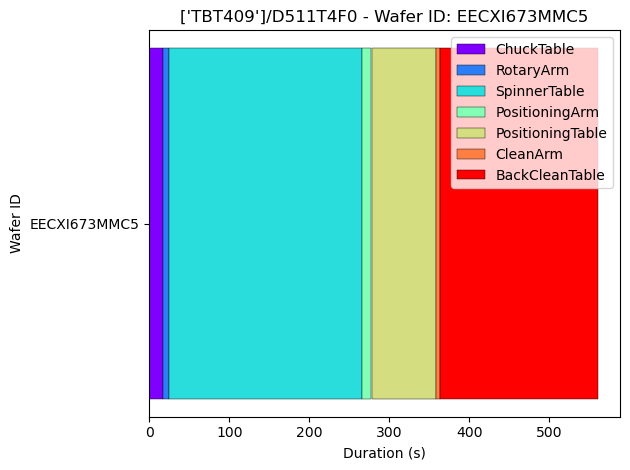

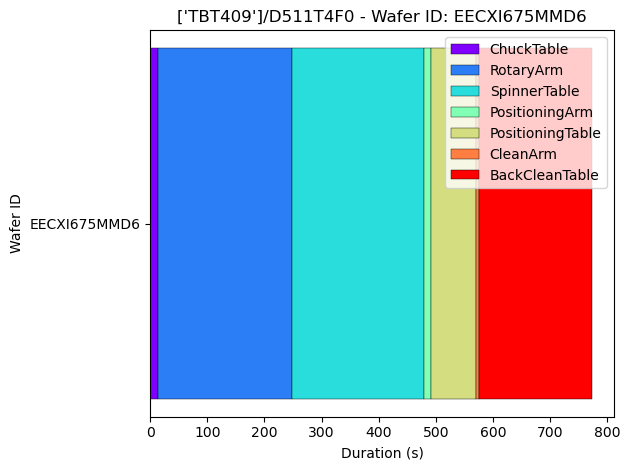

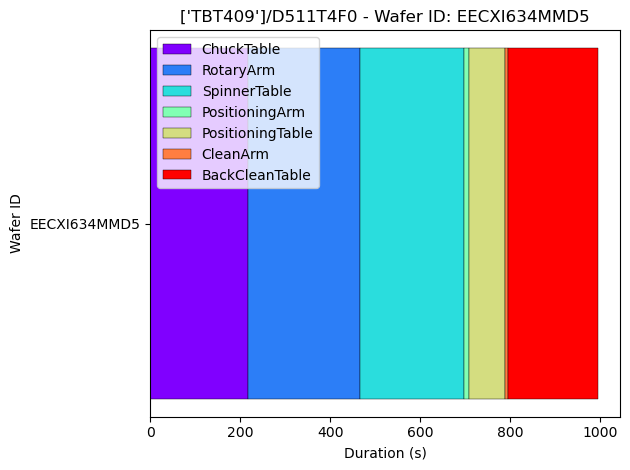

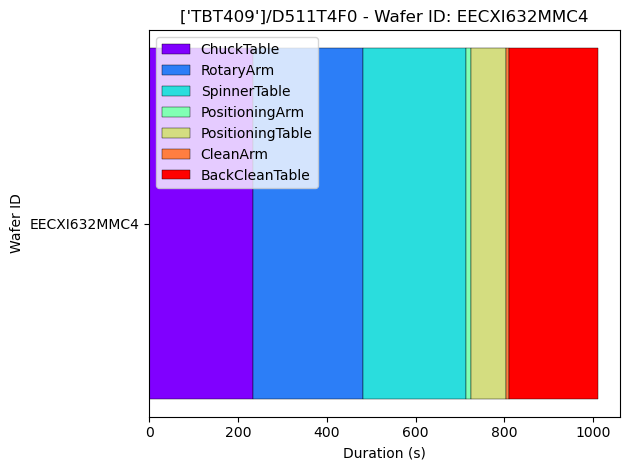

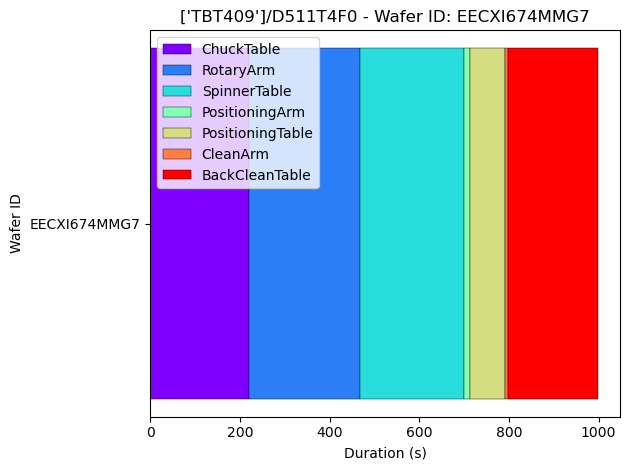

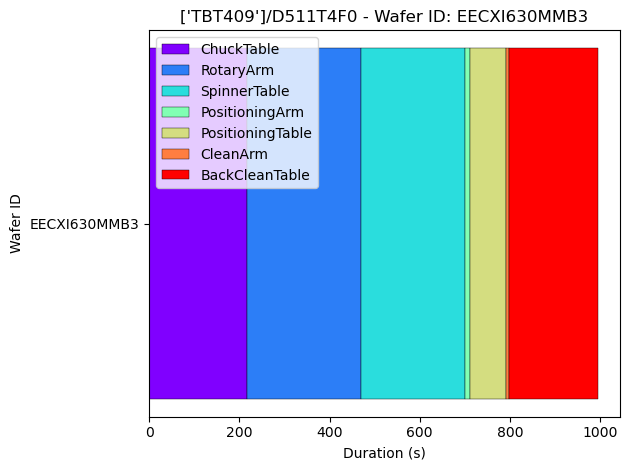

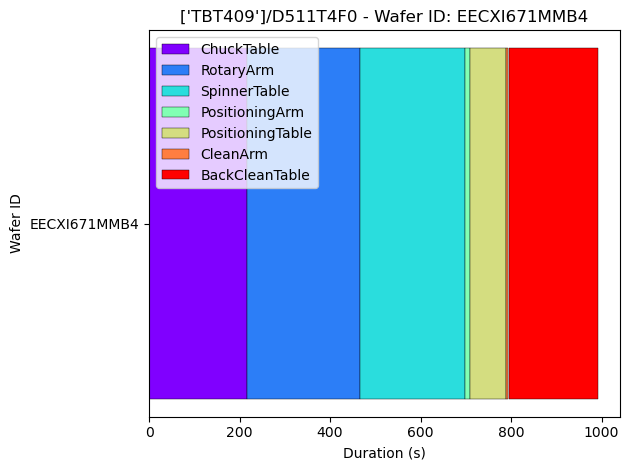

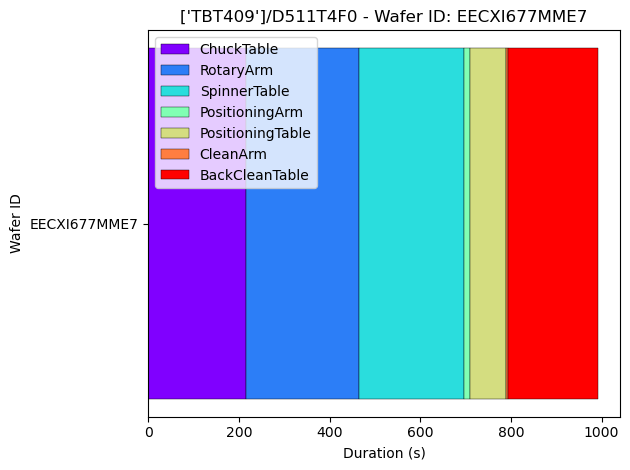

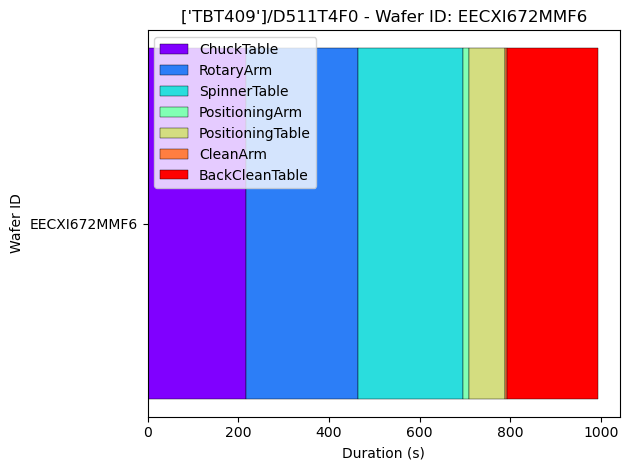

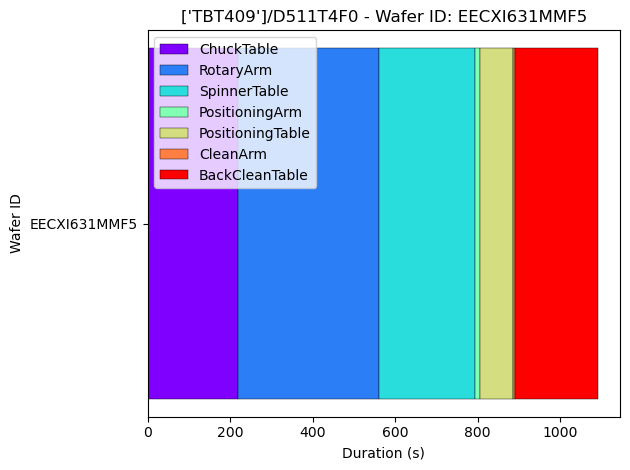

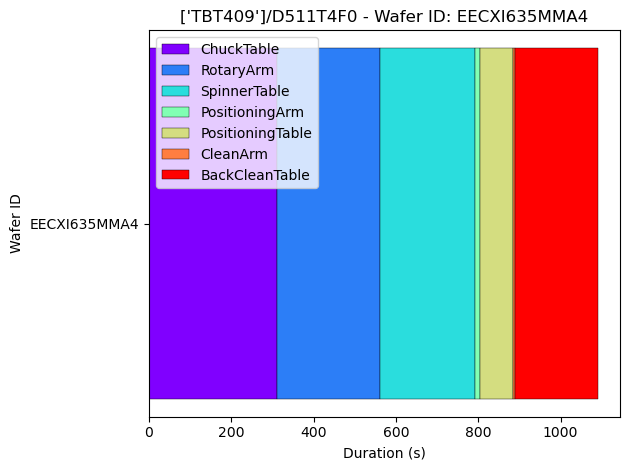

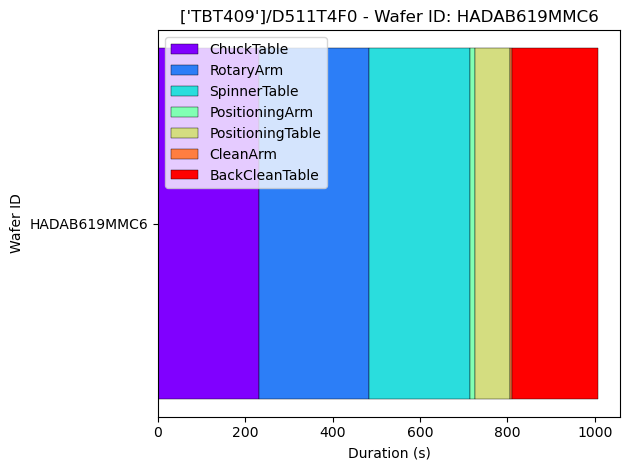

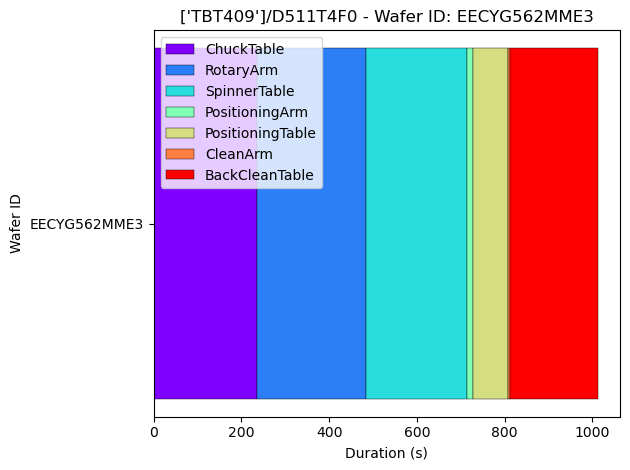

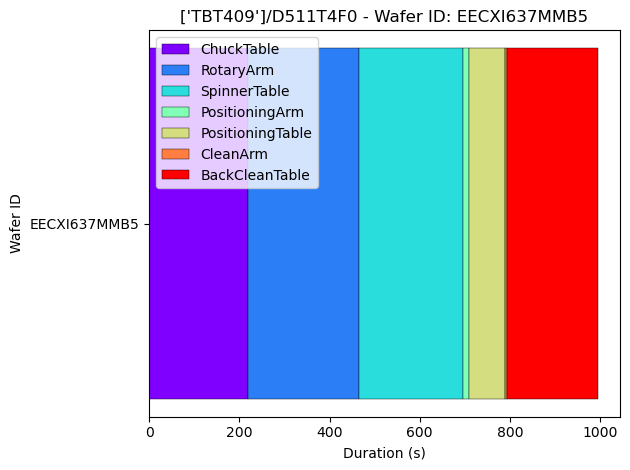

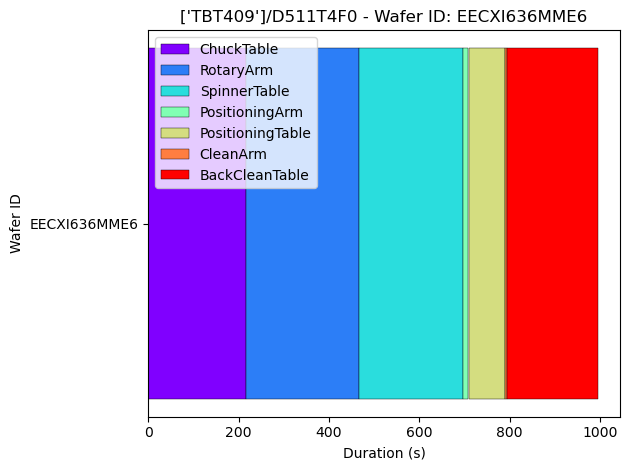

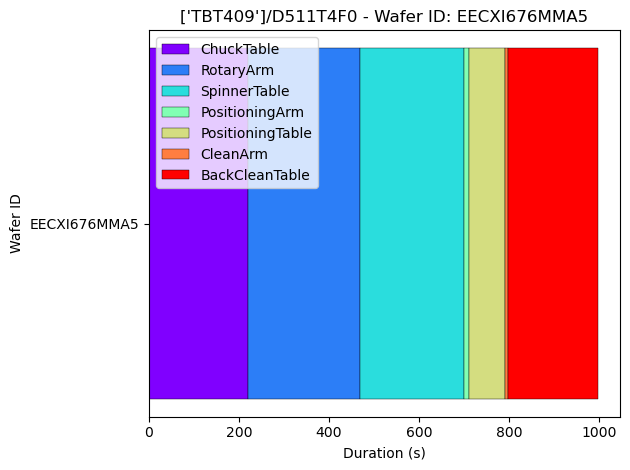

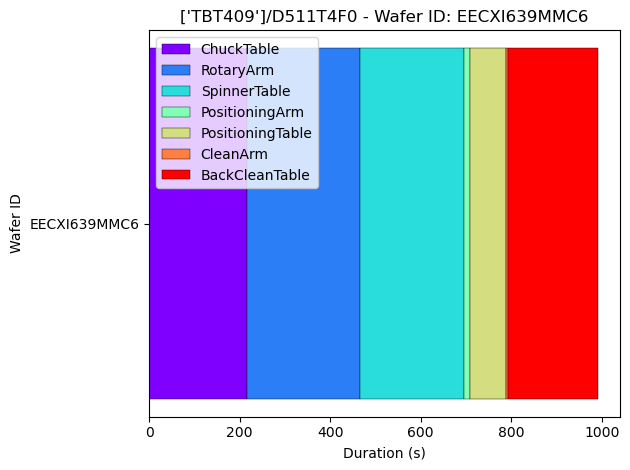

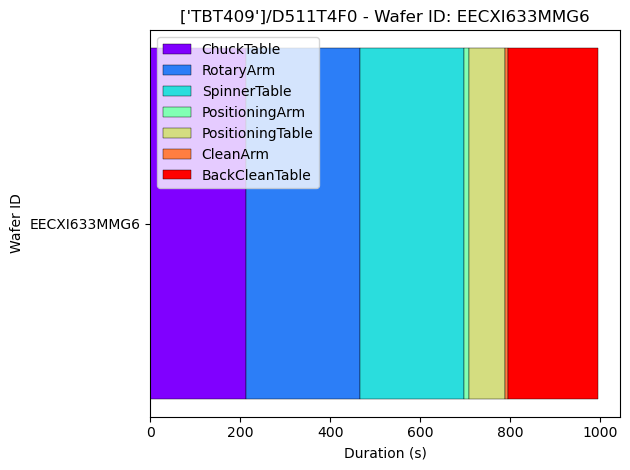

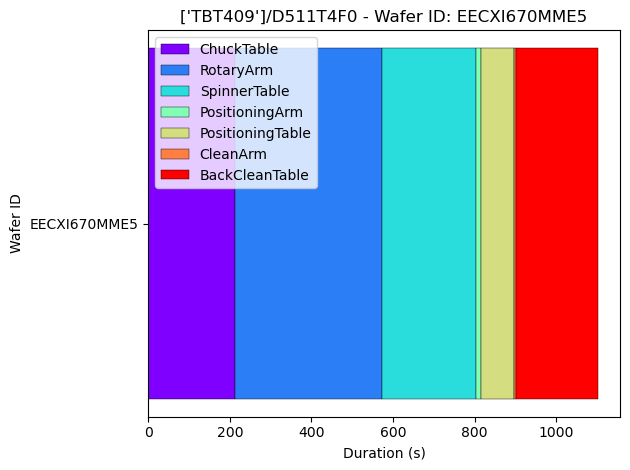

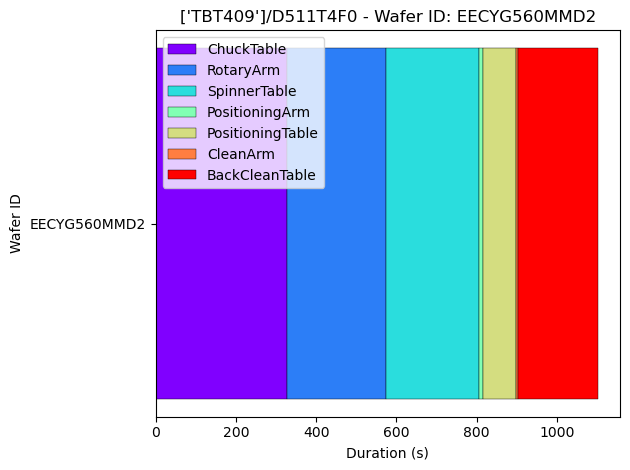

In [112]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming DF is your original DataFrame and color_map is a dictionary mapping chambers to colors

# Get unique wafer IDs
unique_wafer_ids = DF.WAFER_ID.unique()

# Iterate over each unique wafer ID
for wafer_id in unique_wafer_ids:
    # Filter the DataFrame for the current wafer ID
    DF1 = DF[DF.WAFER_ID == wafer_id].reset_index(drop=True)
    
    # Set the initial base time for normalization
    base_time = DF1.START_TIME[0]
    
    # Initialize a set for unique chambers for the legend
    unique_chambers = set()
    
    # Initialize variables to track consecutive processes
    combined_durations = []
    current_chamber = None
    current_start_sec = None
    current_duration = 0
    
    # Iterate over each index in the filtered DataFrame
    for i in range(len(DF1)):
        # Extract values for the current observation using index
        START_TIME = DF1.START_TIME[i]
        END_TIME = DF1.END_TIME[i]
        CHAMBER = DF1.CHAMBER[i]
        
        # Normalize the data
        start_sec = (START_TIME - base_time).total_seconds()
        duration = (END_TIME - START_TIME).total_seconds()
        
        # Check if the current chamber is the same as the previous one
        if CHAMBER == current_chamber:
            # Combine durations
            current_duration += duration
        else:
            # If not the same, plot the previous chamber's bar
            if current_chamber is not None:
                combined_durations.append((current_chamber, current_start_sec, current_duration))
            
            # Start a new chamber
            current_chamber = CHAMBER
            current_start_sec = start_sec
            current_duration = duration
        
        # Add chamber to the set for unique legend
        unique_chambers.add(CHAMBER)
    
    # Plot the last chamber's bar
    if current_chamber is not None:
        combined_durations.append((current_chamber, current_start_sec, current_duration))
    
    # Plot the bars for combined durations
    for chamber, start_sec, duration in combined_durations:
        plt.barh(wafer_id, duration, left=start_sec,
                 color=color_map[chamber], edgecolor='k',
                 linewidth=0.3,
                 label=chamber)
    
    # Configure the plot
    plt.legend(unique_chambers)  # Use the set to ensure unique legend entries
    plt.title(f'{entity}/{lot} - Wafer ID: {wafer_id}')
    plt.xlabel('Duration (s)')
    plt.ylabel('Wafer ID')
    plt.tight_layout()
    
    # Save the plot as an image
    # plt.savefig(f'wafer_{wafer_id}.png', format='png', dpi=300)
    
    # Show the plot
    plt.show()

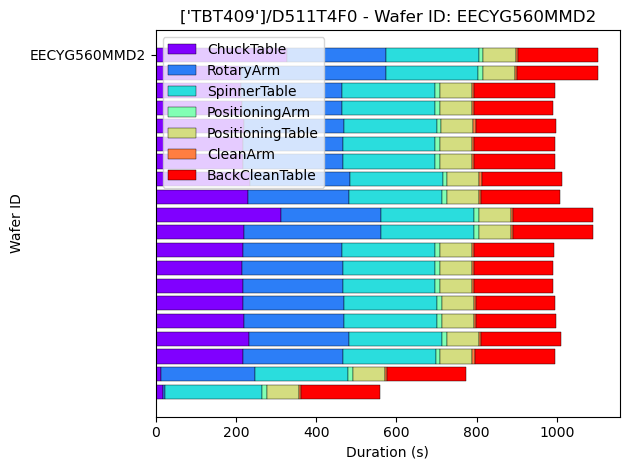

In [113]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming DF is your original DataFrame and color_map is a dictionary mapping chambers to colors

# Get unique wafer IDs
unique_wafer_ids = DF.WAFER_ID.unique()

# Iterate over each unique wafer ID
for wafer_id in unique_wafer_ids:
    # Filter the DataFrame for the current wafer ID
    DF1 = DF[DF.WAFER_ID == wafer_id].reset_index(drop=True)
    
    # Set the initial base time for normalization
    base_time = DF1.START_TIME[0]
    
    # Initialize a set for unique chambers for the legend
    unique_chambers = set()
    
    # Initialize variables to track consecutive processes
    combined_durations = []
    current_chamber = None
    current_start_sec = None
    current_duration = 0
    
    # Iterate over each index in the filtered DataFrame
    for i in range(len(DF1)):
        # Extract values for the current observation using index
        START_TIME = DF1.START_TIME[i]
        END_TIME = DF1.END_TIME[i]
        CHAMBER = DF1.CHAMBER[i]
        
        # Normalize the data
        start_sec = (START_TIME - base_time).total_seconds()
        duration = (END_TIME - START_TIME).total_seconds()
        
        # Check if the current chamber is the same as the previous one
        if CHAMBER == current_chamber:
            # Combine durations
            current_duration += duration
        else:
            # If not the same, store the previous chamber's data
            if current_chamber is not None:
                combined_durations.append((current_chamber, current_start_sec, current_duration))
            
            # Start a new chamber
            current_chamber = CHAMBER
            current_start_sec = start_sec
            current_duration = duration
        
        # Add chamber to the set for unique legend
        unique_chambers.add(CHAMBER)
    
    # Store the last chamber's data
    if current_chamber is not None:
        combined_durations.append((current_chamber, current_start_sec, current_duration))
    
    # Plot the bars for combined durations at the same y-position
    for chamber, start_sec, duration in combined_durations:
        plt.barh(wafer_id, duration, left=start_sec,
                 color=color_map[chamber], edgecolor='k',
                 linewidth=0.3,
                 label=chamber)
    
    # Configure the plot
    plt.legend(unique_chambers)  # Use the set to ensure unique legend entries
    plt.title(f'{entity}/{lot} - Wafer ID: {wafer_id}')
    plt.xlabel('Duration (s)')
    plt.ylabel('Wafer ID')
    plt.yticks([wafer_id], labels=[wafer_id])  # Set y-ticks to the current wafer ID
    plt.tight_layout()
    
    # Save the plot as an image
    # plt.savefig(f'wafer_{wafer_id}.png', format='png', dpi=300)
    
    # Show the plot
plt.show()

In [114]:
END_TIME - START_TIME

Timedelta('0 days 00:03:19.794000')

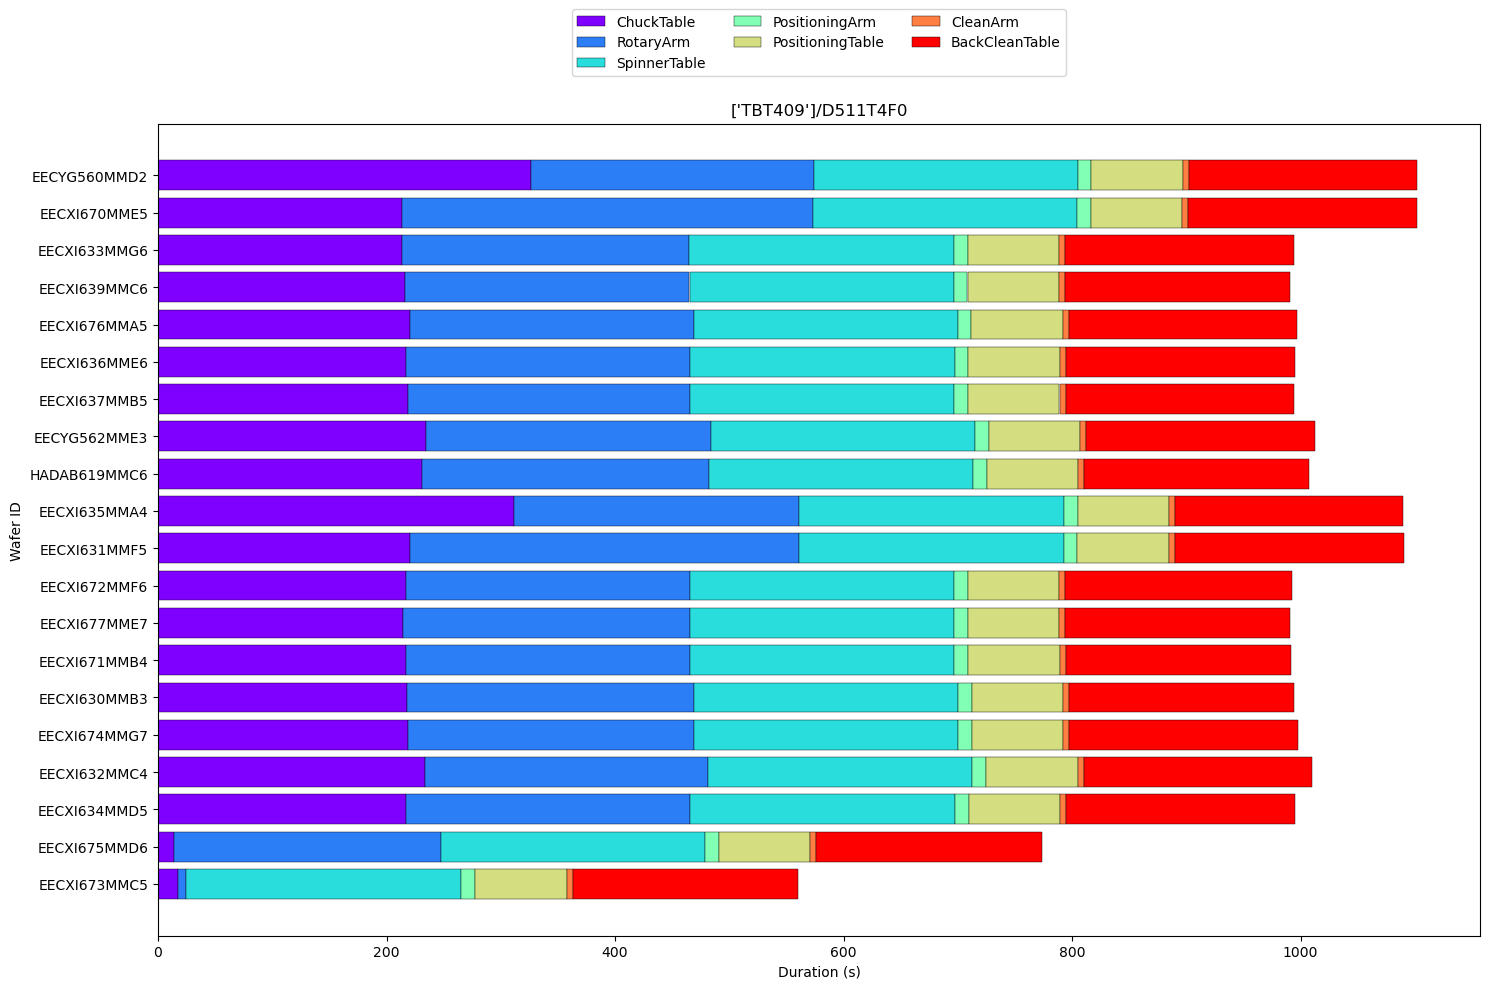

In [ ]:

unique_wafer_ids = waferChamberHistory.WAFER_ID.unique()

unique_chambers_map = waferChamberHistory['CHAMBER'].unique()
    
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_chambers_map)))
color_map=dict(zip(unique_chambers_map, colors))

plt.figure(figsize=(15,10))
for wafer_id in unique_wafer_ids:
    DF1 = waferChamberHistory[waferChamberHistory.WAFER_ID == wafer_id].reset_index(drop=True)
    
    base_time = DF1.START_TIME[0]
    
    unique_chambers = set()
    
    combined_durations = []
    current_chamber = None 
    current_start_sec = None 
    current_duration = 0
    
    for i in range(len(DF1)):
        START_TIME = DF1.START_TIME[i]
        END_TIME = DF1.END_TIME[i]
        CHAMBER = DF1.CHAMBER[i]
        
        #Normalize the data
        start_sec = (START_TIME - base_time).total_seconds()
        duration = (END_TIME - START_TIME).total_seconds()
        
        if CHAMBER == current_chamber:
            current_duration += duration 
        else:
            if current_chamber is not None:
                combined_durations.append((current_chamber, current_start_sec, current_duration))
            
            current_chamber = CHAMBER 
            current_start_sec = start_sec 
            current_duration = duration 
            
        unique_chambers.add(CHAMBER)
    
    if current_chamber is not None:
        combined_durations.append((current_chamber, current_start_sec, current_duration))
        
    
    for chamber, start_sec, duration in combined_durations:
        
        plt.barh(wafer_id, duration, left=start_sec,
                 color=color_map[chamber],
                 edgecolor='k', linewidth=0.3,
                 label=chamber)
    plt.title(f"{entity}/{lot}")
    plt.xlabel('Duration (s)')
    plt.ylabel('Wafer ID')
    # plt.legend(unique_chambers, loc='lower center', bbox_to_anchor=(0.5, 1.05))  # Use the set to ensure unique legend entries
    plt.legend(unique_chambers, loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=3)  # Use ncol to arrange legend horizontally

    plt.tight_layout()
    
    # Save the plot as an image
    # plt.savefig(f'plot1.png', format='png', dpi=300)
    

In [116]:
import matplotlib.pyplot as plt
import numpy as np

def plot_wafer_history(waferChamberHistory, entity, lot):
    """
    Plots the wafer history for each unique wafer ID in the given DataFrame.

    Parameters:
    waferChamberHistory (DataFrame): The DataFrame containing wafer chamber history data.
    entity (str): The entity name for the plot title.
    lot (str): The lot name for the plot title.
    """
    unique_wafer_ids = waferChamberHistory.WAFER_ID.unique()
    
    unique_chambers_map = waferChamberHistory['CHAMBER'].unique()
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_chambers_map)))
    color_map=dict(zip(unique_chambers_map, colors))

    # Initialize a set for unique chambers
    unique_chambers = set()

    

    plt.figure(figsize=(15, 10))
    for wafer_id in unique_wafer_ids:
        DF1 = waferChamberHistory[waferChamberHistory.WAFER_ID == wafer_id].reset_index(drop=True)
        
        base_time = DF1.START_TIME[0]
        
        combined_durations = []
        current_chamber = None 
        current_start_sec = None 
        current_duration = 0
        
        for i in range(len(DF1)):
            START_TIME = DF1.START_TIME[i]
            END_TIME = DF1.END_TIME[i]
            CHAMBER = DF1.CHAMBER[i]
            
            # Normalize the data
            start_sec = (START_TIME - base_time).total_seconds()
            duration = (END_TIME - START_TIME).total_seconds()
            
            if CHAMBER == current_chamber:
                current_duration += duration 
            else:
                if current_chamber is not None:
                    combined_durations.append((current_chamber, current_start_sec, current_duration))
                
                current_chamber = CHAMBER 
                current_start_sec = start_sec 
                current_duration = duration 
                
            unique_chambers.add(CHAMBER)
            
                
        if current_chamber is not None:
            combined_durations.append((current_chamber, current_start_sec, current_duration))
            
        for chamber, start_sec, duration in combined_durations:
            plt.barh(wafer_id, duration, left=start_sec,
                     color=color_map[chamber],
                     edgecolor='k', linewidth=0.3,
                     label=chamber)
    
    plt.title(f"{entity}/{lot}")
    plt.xlabel('Duration (s)')
    plt.ylabel('Wafer ID')
    plt.legend(unique_chambers, loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=3)  # Use ncol to arrange legend horizontally
    plt.tight_layout()
    
    

# Example usage:
# plot_wafer_history(waferChamberHistory, 'EntityName', 'LotName')

In [117]:
entity=unique_entities

In [118]:
entity, lot

(array(['TBT409'], dtype=object), 'D511T4F0')

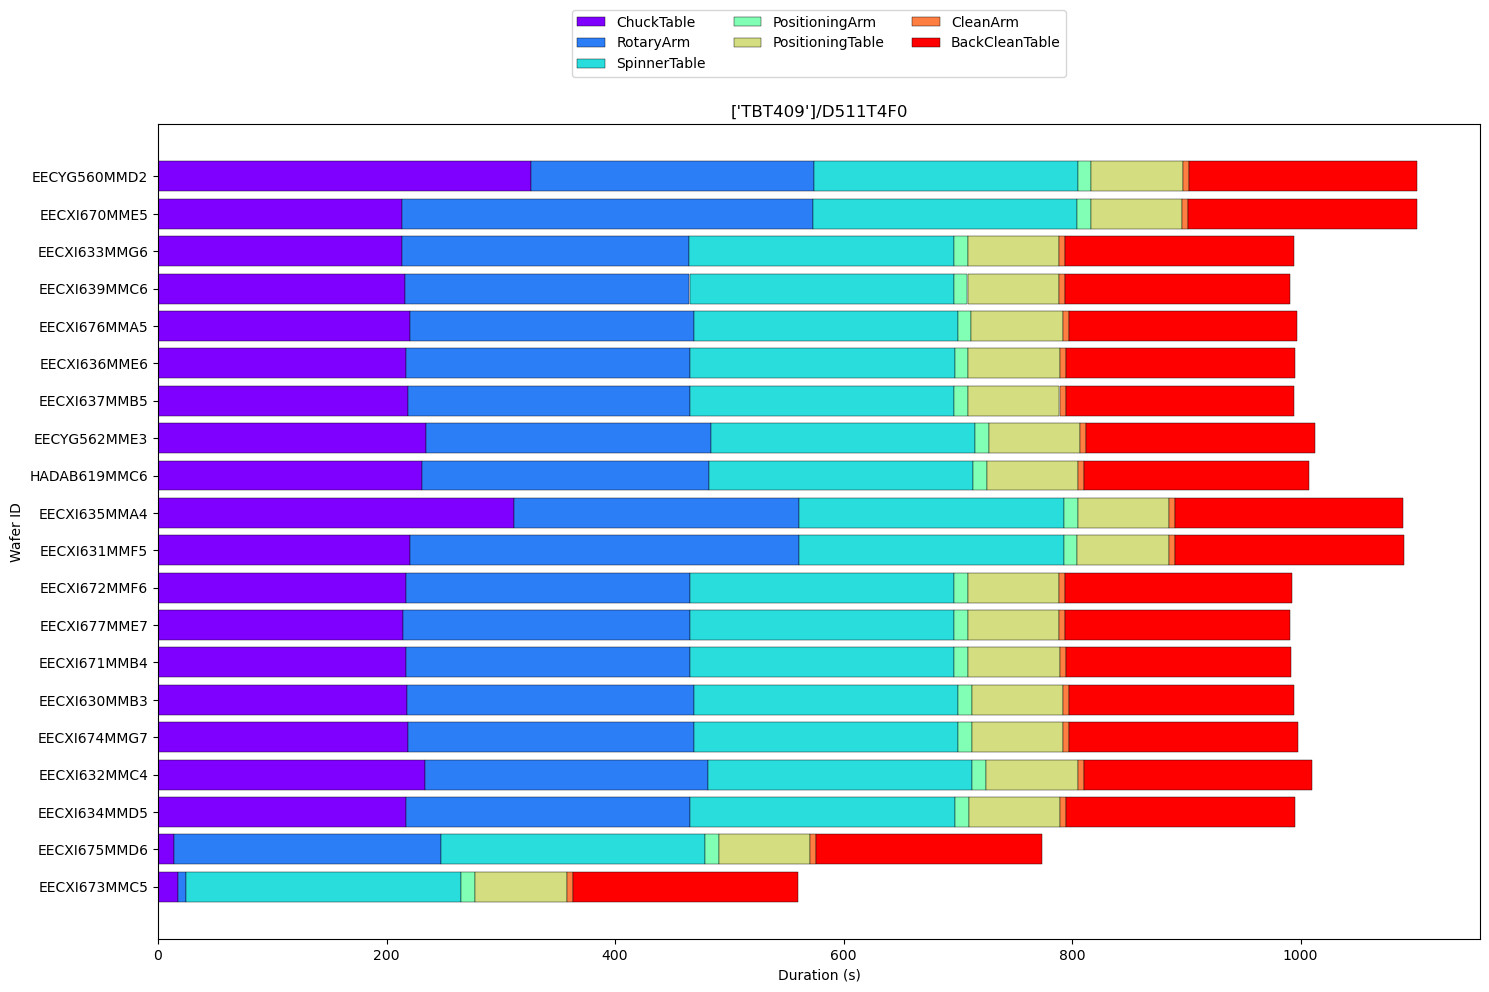

In [ ]:
plot_wafer_history(waferChamberHistory, entity, lot)

# Save the plot as an image
# plt.savefig(f'plot2.png', format='png', dpi=300)

In [120]:
###################################################
###################################################

def plot_wafer_history(waferChamberHistory, entity, lot):
    """
    Plot the wafer history data.
    """

    # Convert START_TIME and END_TIME to datetime
    waferChamberHistory['START_TIME'] = pd.to_datetime(waferChamberHistory['START_TIME'], errors='coerce')
    waferChamberHistory['END_TIME'] = pd.to_datetime(waferChamberHistory['END_TIME'], errors='coerce')
    # Drop rows with NaT in START_TIME or END_TIME
    waferChamberHistory.dropna(subset=['START_TIME', 'END_TIME'], inplace=True)

    # Sort data by START_TIME
    waferChamberHistory.sort_values(by='START_TIME', inplace=True)

    # Plotting
    plt.figure(figsize=(12, 6))

    # Use a rainbow colormap
    unique_chambers = waferChamberHistory['CHAMBER'].unique()
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_chambers)))
    color_map = dict(zip(unique_chambers, colors))

    # Track plotted chambers for the legend
    plotted_chambers = set()

    for index, row in waferChamberHistory.iterrows():
        start_time = row['START_TIME']
        end_time = row['END_TIME']
        wafer_id = row['WAFER_ID']
        slot = row['SLOT']
        chamber = row['CHAMBER']
        
        # Combine slot and wafer_id for the y-axis label
        y_label = f"Slot {slot}: {wafer_id}"
        
        # Plot a horizontal bar with rainbow colors and black edge
        plt.barh(y_label, end_time - start_time, left=start_time,
                 color=color_map[chamber], edgecolor='black', 
                 label=chamber if chamber not in plotted_chambers else None)

        # Ensure each chamber is only added once to the legend
        plotted_chambers.add(chamber)

    # Titles and labels
    plt.title(f'{entity} / {lot} Wafer Movement')  # Include entity in the title
    plt.xlabel('Time')
    plt.ylabel('Wafer ID')

    # Set custom ticks
    start, end = waferChamberHistory['START_TIME'].min(), waferChamberHistory['END_TIME'].max()
    tick_positions = np.linspace(date2num(start), date2num(end), 20)
    plt.xticks(tick_positions)
    plt.gca().set_xticklabels([num2date(pos).strftime('%Y-%m-%d %H:%M:%S') for pos in tick_positions])
    plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))

    # Add legend only for unique entries
    plt.legend(title='Chamber', loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=3)

    # Rotate date labels for better readability
    plt.xticks(rotation=90)

    # Apply tight layout
    plt.tight_layout()

    # Show plot. needs to be closed to save properly
    # plt.show()

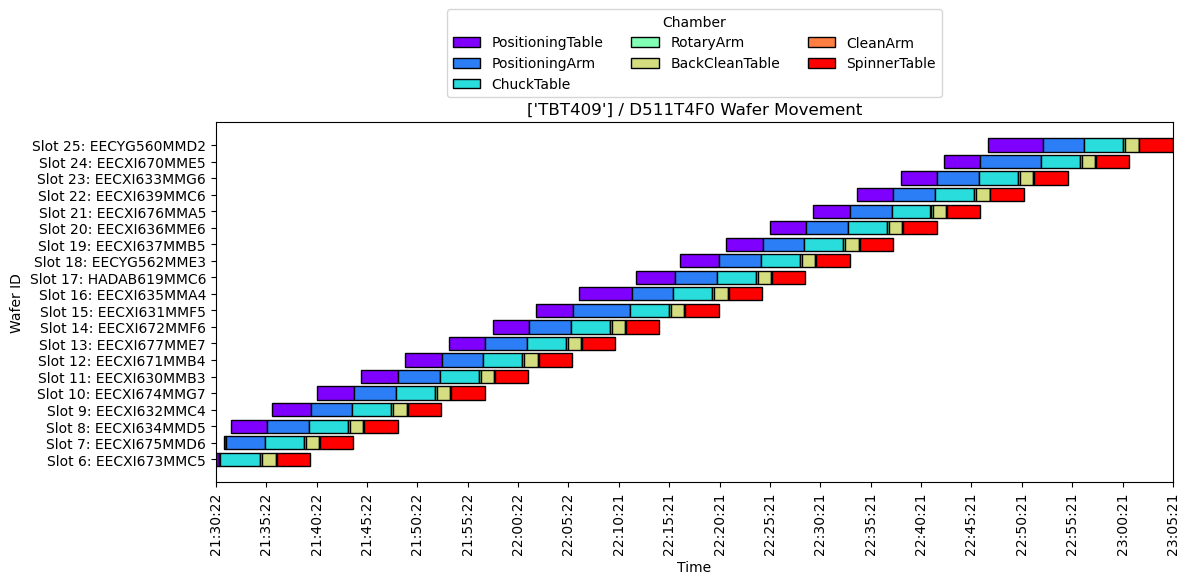

In [121]:
plot_wafer_history(waferChamberHistory, entity, lot)

In [122]:
def main_gui():
    
    def generate_wafer_movement_plot():
        status_label.config(text="Generating wafer movement plot...")
        root.update_idletasks()
        
        # Strip whitespace from inputs
        lot = lot_entry.get().strip()
        operation = oper_entry.get().strip()
        
        updated_query = sql_waferChamberHistory(operation, lot)
        waferChamberHistory = run_sql(updated_query, ds)
        
        unique_entities = waferChamberHistory['ENTITY'].unique()
        plot_wafer_history(waferChamberHistory, unique_entities[0], lot)
        plot_img_base64 = plot_to_base64()
        export_to_html(pd.DataFrame(), plot_img_base64)
        
        status_label.config(text="")

    root = tk.Tk()
    root.title("LAK Lot Report Generator")
    root.geometry("450x370")  # This sets window width and height

    # Setup GUI input components
    ttk.Label(root, text="Lot ID (Last 60 days, no TWs):").grid(column=0, row=0, padx=5, pady=5, sticky=tk.W)
    lot_entry = ttk.Entry(root)
    lot_entry.grid(column=0, row=1, padx=5, pady=5, sticky=tk.W)
    lot_entry.insert(0, "D4528220")

    ttk.Label(root, text="Operation:").grid(column=0, row=2, padx=5, pady=5, sticky=tk.W)
    oper_entry = ttk.Entry(root)
    oper_entry.grid(column=0, row=3, padx=5, pady=5, sticky=tk.W)
    oper_entry.insert(0, "257717")

    # Button for generating wafer movement plot
    tk.Button(root, text="3. Generate Wafer Movement Plot", command=generate_wafer_movement_plot)\
        .grid(column=0, row=6, padx=4, pady=5, sticky=tk.W)

    # Close button
    tk.Button(root, text="Close", command=root.destroy)\
    .grid(column=0, row=8, padx=5, pady=5, sticky=tk.W)
    status_label = ttk.Label(root, text="")

    status_label.grid(column=0, row=5, padx=5, pady=5, sticky=tk.W)


    status_label = ttk.Label(root, text="")
    status_label.grid(column=0, row=11, padx=5, pady=5, sticky=tk.W)

    root.mainloop()

if __name__ == "__main__":
    main_gui()


Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/jacobma1/anaconda3/lib/python3.10/tkinter/__init__.py", line 1921, in __call__
    return self.func(*args)
  File "/tmp/ipykernel_149021/3175406844.py", line 15, in generate_wafer_movement_plot
    plot_wafer_history(waferChamberHistory, unique_entities[0], lot)
IndexError: index 0 is out of bounds for axis 0 with size 0
